# Goal : Will the patient survive for at least one year after a heart attack?

### This data set has 132 rows and 12 columns.
The data set provides data that could be used for classifying if patients will survive for at least one year after a heart attack.
All the patients suffered heart attacks at some point in the past. Some are still alive and some are not. 
The survival and still-alive variables, when taken together, indicate whether a patient survived for at least one year following the heart attack.

### Note : According to the source: 
The problem addressed by past researchers was to predict from the other variables whether or not the patient will survive at least one year. 
The most difficult part of this problem is correctly predicting that the patient will NOT survive. (Part of the difficulty seems to be the size of the data set.)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Emincan\Desktop\Dojo-Projects-Local\DATA\Echocardiogram\echocardiogram.data', sep=',', names=['Survival', 'Still-alive', 'Age-at-Heart-Attack', 'Fluid-or-Not', 'Fractional-Shortening', 'Epss', 'Lvdd', 'Wall-motion-score', 'Wall-motion-index', 'Mult', 'Name', 'Group', 'Alive-at-1'], na_values='?')

target_col = 'Alive-at-1'

print(f"DF shape :{df.shape}")

df.head()

DF shape :(132, 13)


,Survival,Still-alive,Age-at-Heart-Attack,Fluid-or-Not,Fractional-Shortening,Epss,Lvdd,Wall-motion-score,Wall-motion-index,Mult,Name,Group,Alive-at-1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,name,1.0,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1.0,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1.0,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1.0,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survival               130 non-null    float64
 1   Still-alive            131 non-null    float64
 2   Age-at-Heart-Attack    127 non-null    float64
 3   Fluid-or-Not           131 non-null    float64
 4   Fractional-Shortening  124 non-null    float64
 5   Epss                   117 non-null    float64
 6   Lvdd                   121 non-null    float64
 7   Wall-motion-score      128 non-null    float64
 8   Wall-motion-index      131 non-null    float64
 9   Mult                   128 non-null    float64
 10  Name                   132 non-null    object 
 11  Group                  110 non-null    float64
 12  Alive-at-1             74 non-null     float64
dtypes: float64(12), object(1)
memory usage: 13.5+ KB


In [4]:
df.drop('Name' , axis = 1 , inplace = True) # All names are hidden, probably because of personal data.

In [5]:
num_cols = df.select_dtypes(exclude=['object','category']).columns.tolist()
cat_cols = df.select_dtypes(include=['category']).columns.tolist()

In [6]:
# Total Summary

def set_frame_style(df, caption=""):
    """Helper function to set dataframe presentation style.
    """
    return df.style.background_gradient(cmap='Blues').set_caption(caption).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'Blue'),
        ('font-size', '18px'),
        ('font-weight','bold')
    ]}])

def check_data(data, title):
    cols = data.columns.to_list()
    display(set_frame_style(data[cols].head(),f'{title}: First 5 Rows Of Data'))
    display(set_frame_style(data[cols].describe(),f'{title}: Summary Statistics'))
    display(set_frame_style(data[cols].nunique().to_frame().rename({0:'Unique Value Count'}, axis=1).transpose(), f'{title}: Unique Value Counts In Each Column'))
    display(set_frame_style(data[cols].isna().sum().to_frame().transpose(), f'{title}:Columns With Nan'))
    
check_data(df, 'Train data')
print('-'*100)
# check_data(df_test, 'Test data')
# print('-'*100)
# check_data(original, 'Original data')

,Survival,Still-alive,Age-at-Heart-Attack,Fluid-or-Not,Fractional-Shortening,Epss,Lvdd,Wall-motion-score,Wall-motion-index,Mult,Group,Alive-at-1
0,11.000000,0.000000,71.000000,0.000000,0.260000,9.000000,4.600000,14.000000,1.000000,1.000000,1.000000,0.000000
1,19.000000,0.000000,72.000000,0.000000,0.380000,6.000000,4.100000,14.000000,1.700000,0.588000,1.000000,0.000000
2,16.000000,0.000000,55.000000,0.000000,0.260000,4.000000,3.420000,14.000000,1.000000,1.000000,1.000000,0.000000
3,57.000000,0.000000,60.000000,0.000000,0.253000,12.062000,4.603000,16.000000,1.450000,0.788000,1.000000,0.000000
4,19.000000,1.000000,57.000000,0.000000,0.160000,22.000000,5.750000,18.000000,2.250000,0.571000,1.000000,0.000000


,Survival,Still-alive,Age-at-Heart-Attack,Fluid-or-Not,Fractional-Shortening,Epss,Lvdd,Wall-motion-score,Wall-motion-index,Mult,Group,Alive-at-1
count,130.000000,131.000000,127.000000,131.000000,124.000000,117.000000,121.000000,128.000000,131.000000,128.000000,110.000000,74.000000
mean,22.182923,0.328244,62.925425,0.183206,0.216734,12.164769,4.763157,14.438125,1.382748,0.776719,1.781818,0.324324
std,15.858267,0.471377,8.403757,0.388320,0.107513,7.370159,0.810013,5.018566,0.453378,0.199078,0.414902,0.471317
min,0.030000,0.000000,35.000000,0.000000,0.010000,0.000000,2.320000,2.000000,1.000000,0.140000,1.000000,0.000000
25%,7.875000,0.000000,57.000000,0.000000,0.150000,7.000000,4.230000,11.000000,1.000000,0.713000,2.000000,0.000000
50%,23.500000,0.000000,62.000000,0.000000,0.205000,11.000000,4.650000,14.000000,1.222000,0.786000,2.000000,0.000000
75%,33.000000,1.000000,68.000000,0.000000,0.270000,16.100000,5.300000,16.500000,1.535000,0.857000,2.000000,1.000000
max,57.000000,1.000000,86.000000,1.000000,0.610000,40.000000,6.780000,39.000000,3.000000,2.000000,2.000000,1.000000


,Survival,Still-alive,Age-at-Heart-Attack,Fluid-or-Not,Fractional-Shortening,Epss,Lvdd,Wall-motion-score,Wall-motion-index,Mult,Group,Alive-at-1
Unique Value Count,53,2,38,2,51,82,94,45,59,27,2,2


,Survival,Still-alive,Age-at-Heart-Attack,Fluid-or-Not,Fractional-Shortening,Epss,Lvdd,Wall-motion-score,Wall-motion-index,Mult,Group,Alive-at-1
0,2,1,5,1,8,15,11,4,1,4,22,58


----------------------------------------------------------------------------------------------------


* There is too many nan values. Its problem.
* Still-alive , Fluid-or-Not , Group would be thought as categoric features.

In [7]:
df[target_col].value_counts(dropna=False)

NaN    58
0.0    50
1.0    24
Name: Alive-at-1, dtype: int64

# Train | Test Split

In [8]:
df_train_full = df[~df[target_col].isna()]
df_test = df[df[target_col].isna()]

In [9]:
from sklearn.model_selection import train_test_split

df_train , df_valid = train_test_split(df_train_full, test_size=0.2, random_state=34)

In [10]:
# from sklearn.model_selection import train_test_split

# df_train , df_test = train_test_split(df, test_size=0.2, random_state=34 , stratify=df[target_col])

# EDA

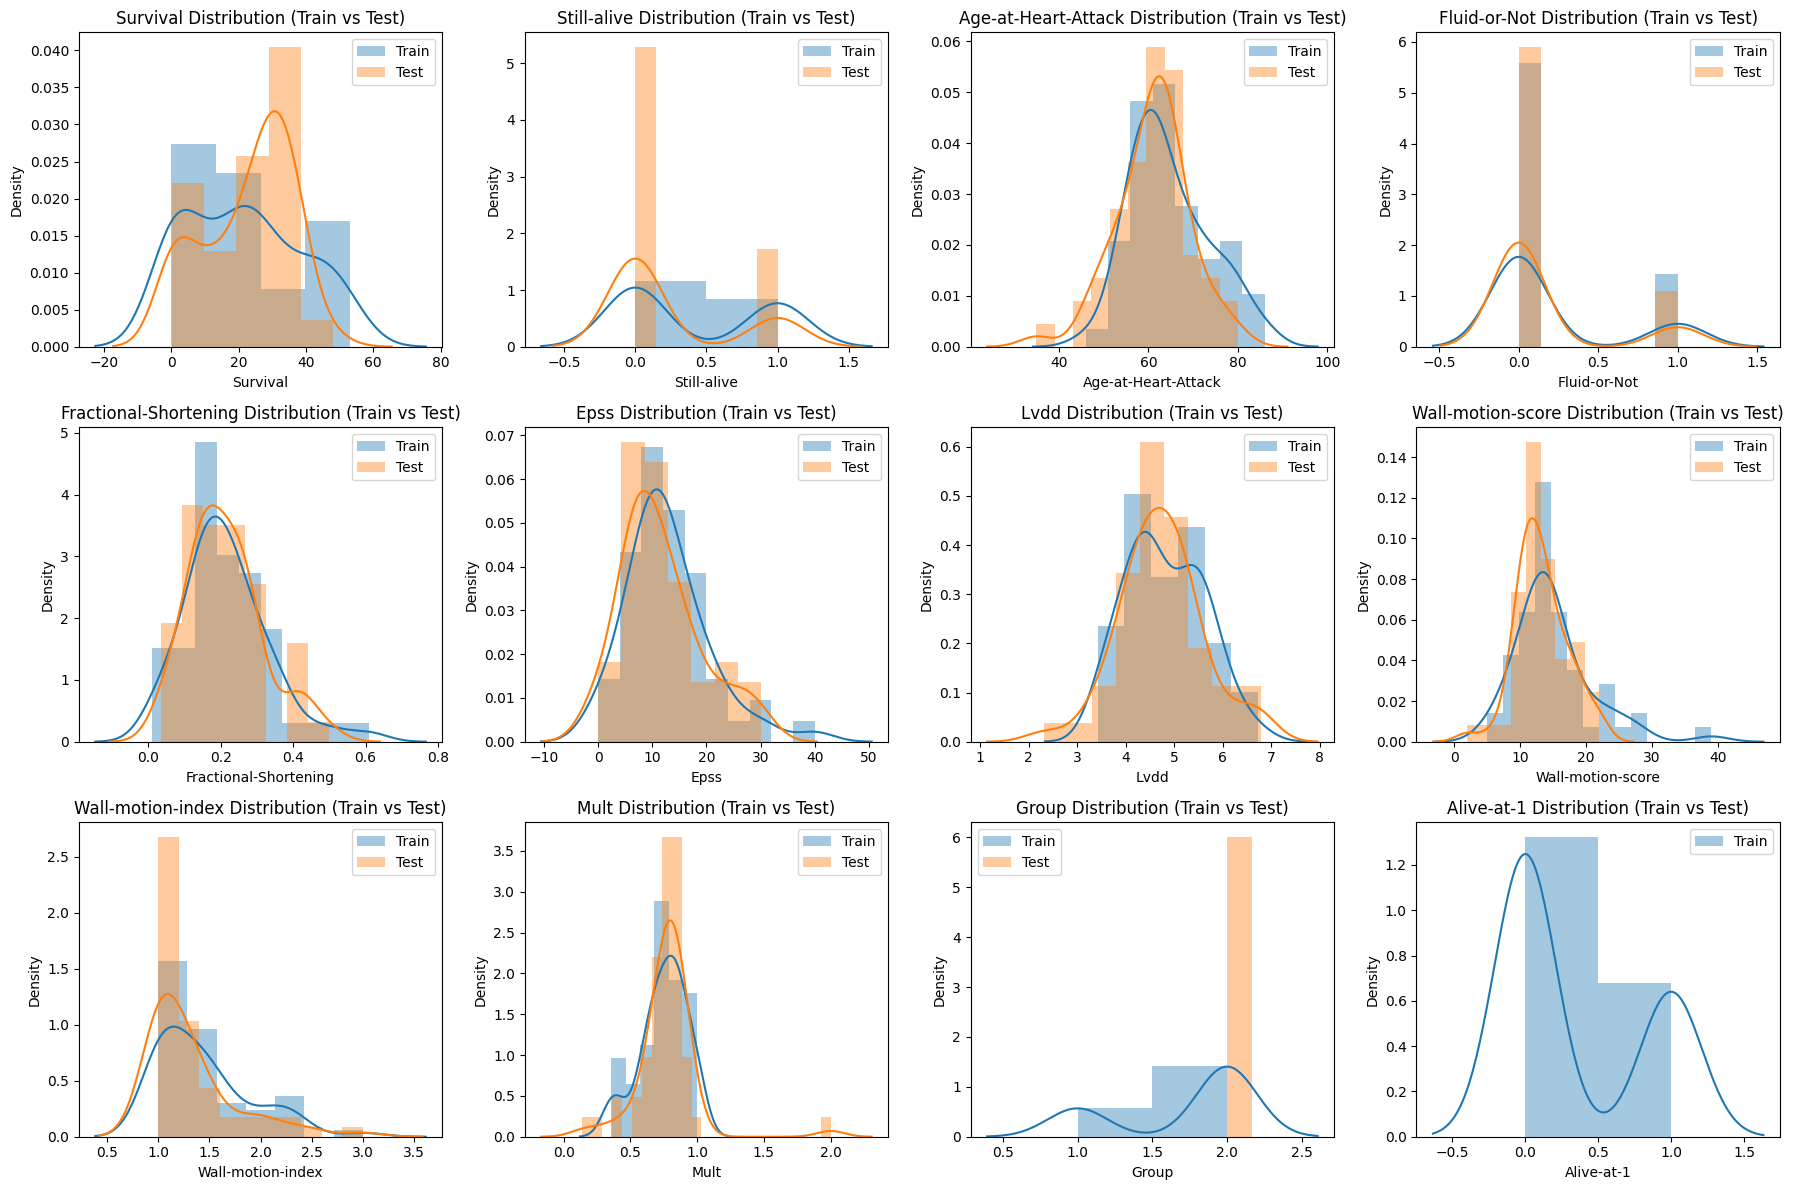

In [11]:
import warnings
warnings.filterwarnings("ignore")

def plot_histograms(df_train, df_test, target_col, n_cols=3):
    n_rows = (len(df_train.columns) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows))
    axes = axes.flatten()

    for i, var_name in enumerate(df_train.columns.tolist()):
        if var_name != 'is_generated':
            ax = axes[i]
            sns.distplot(df_train[var_name], kde=True, ax=ax, label='Train')
            if var_name != target_col:
                sns.distplot(df_test[var_name], kde=True, ax=ax, label='Test')
            ax.set_title(f'{var_name} Distribution (Train vs Test)')
            ax.legend()

    plt.tight_layout()
    plt.show()

plot_histograms(df_train[num_cols], df_test[num_cols], target_col, n_cols=4)

* Train and Test Datasets looks similiar.

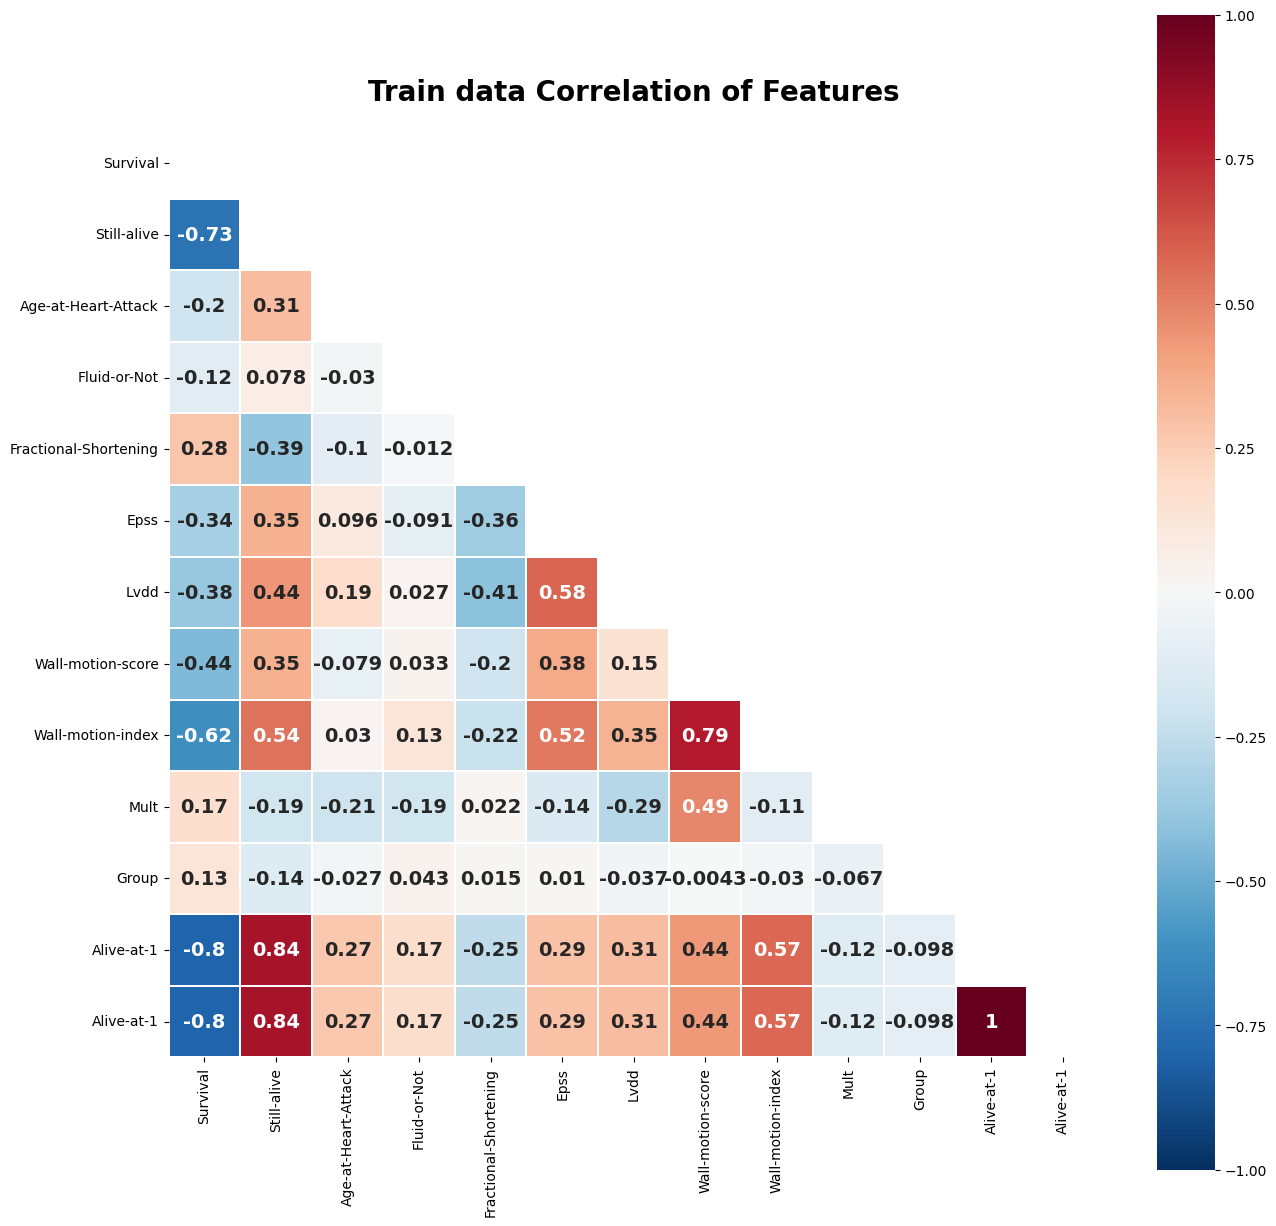

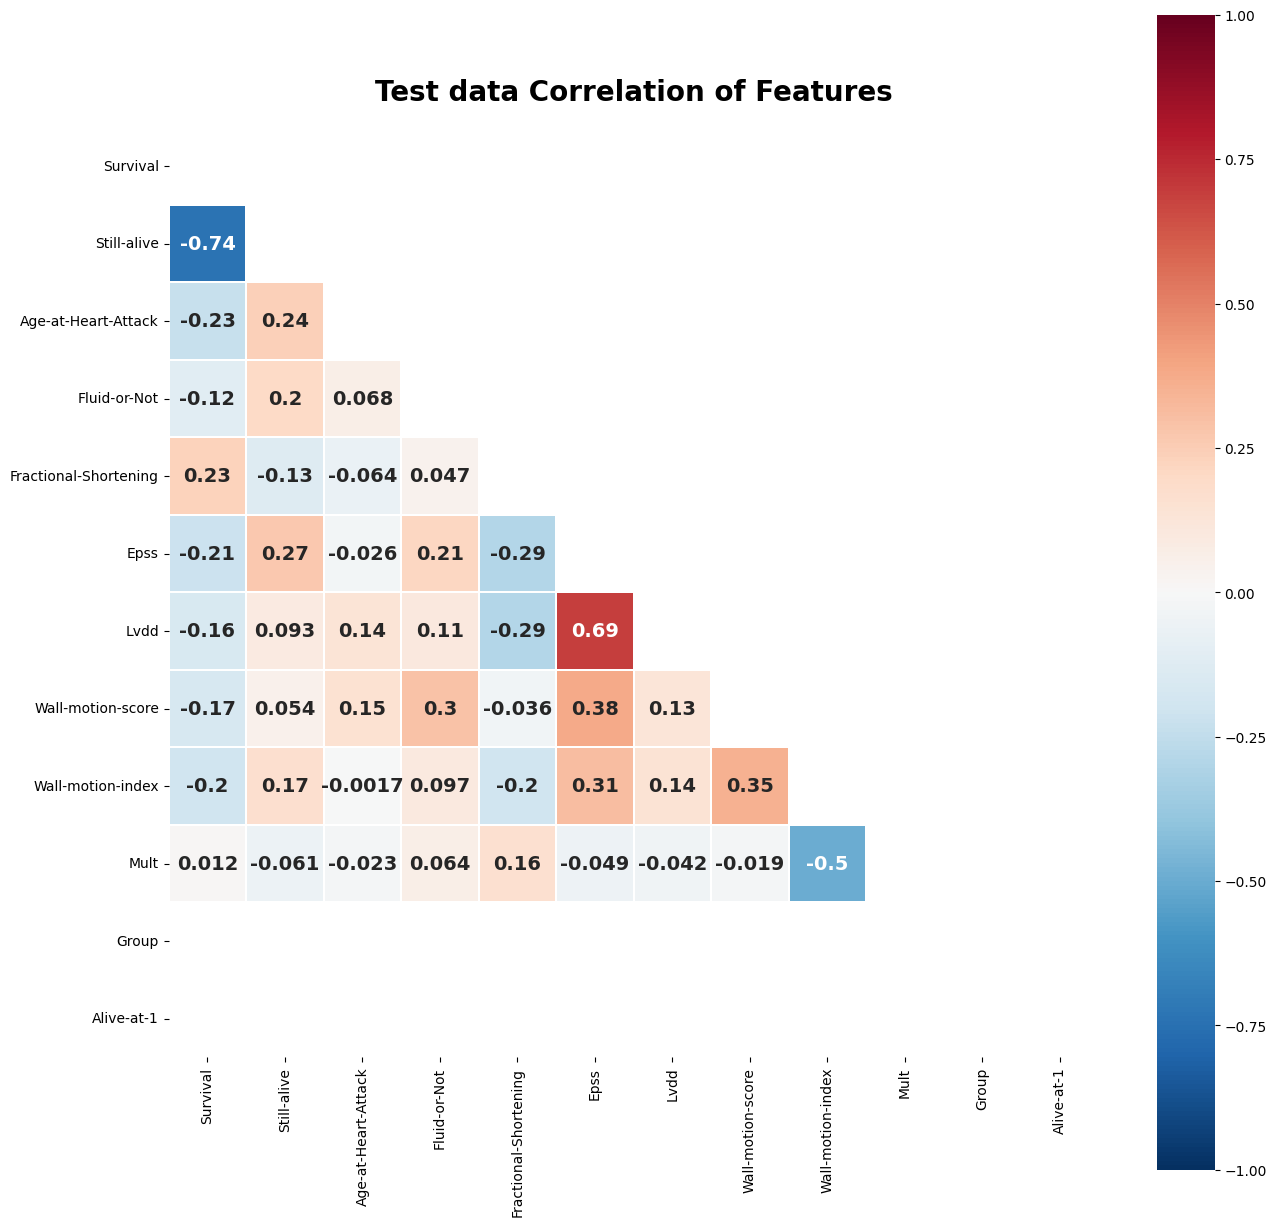

In [12]:
def plot_heatmap(df, title):
    # Create a mask for the diagonal elements
    mask = np.zeros_like(df.astype(float).corr())
    mask[np.triu_indices_from(mask)] = True

    # Set the colormap and figure size
    colormap = plt.cm.RdBu_r
    plt.figure(figsize=(15, 15))

    # Set the title and font properties
    plt.title(f'{title} Correlation of Features', fontweight='bold', y=1.02, size=20)

    # Plot the heatmap with the masked diagonal elements
    sns.heatmap(df.astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1.0, 
                square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 14, "weight": "bold"},
                mask=mask)

plot_heatmap(df_train[num_cols+[target_col]], title='Train data')
plot_heatmap(df_test[num_cols], title='Test data')
# plot_heatmap(original[num_cols+[target_col]], title='original')

* As we expect, Survival and Still-alive highly correlated with our target feature. Expect Group and Mult, other features also correlated with our Target Feature. Its good.

In [13]:
# for df in [df_train , df_test]:
#     df = df.drop('Mult' , axis= 1)
#     df = df.drop('Group' , axis= 1)
#     df = df.drop('Wall-motion-score' , axis= 1)

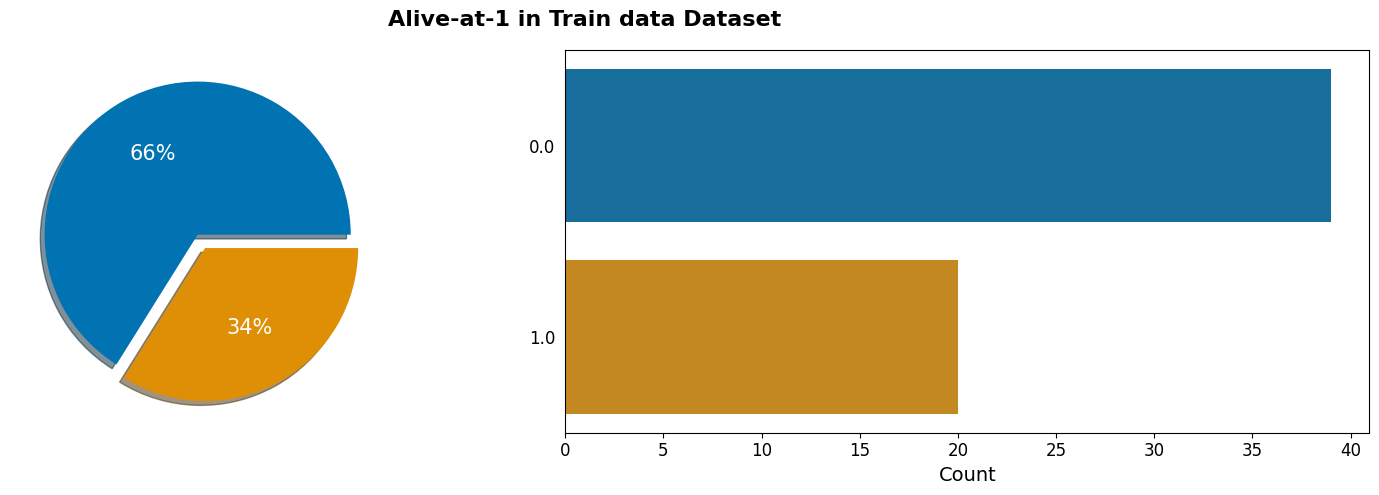

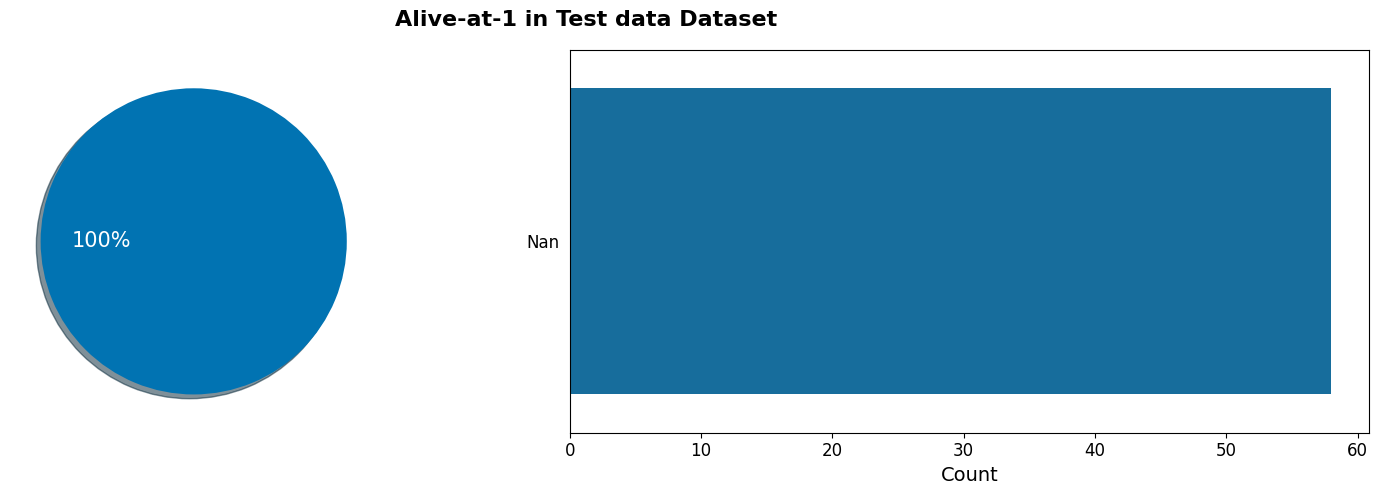

In [14]:
def plot_target_feature(df_train, target_col, figsize=(16,5), palette='colorblind', name='Train'):
    df_train = df_train.fillna('Nan')

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    ax = ax.flatten()

    # Pie chart
    pie_colors = sns.color_palette(palette, len(df_train[target_col].unique()))
    ax[0].pie(
        df_train[target_col].value_counts(),
        shadow=True,
        explode=[0.05] * len(df_train[target_col].unique()),
        autopct='%1.f%%',
        textprops={'size': 15, 'color': 'white'},
        colors=pie_colors
    )
    ax[0].set_aspect('equal')  # Fix the aspect ratio to make the pie chart circular

    # Bar plot
    bar_colors = sns.color_palette(palette)
    sns.countplot(
        data=df_train,
        y=target_col,
        ax=ax[1],
        palette=bar_colors
    )
    ax[1].set_xlabel('Count', fontsize=14)
    ax[1].set_ylabel('')
    ax[1].tick_params(labelsize=12)
    ax[1].yaxis.set_tick_params(width=0)  # Remove tick lines for y-axis

    fig.suptitle(f'{target_col} in {name} Dataset', fontsize=16, fontweight='bold')
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_target_feature(df_train, target_col, figsize=(16,5), palette='colorblind', name='Train data')
plot_target_feature(df_test, target_col, figsize=(16,5), palette='colorblind', name='Test data')

* In the train dataset we can say that most people are going to die in 1 year. 68%

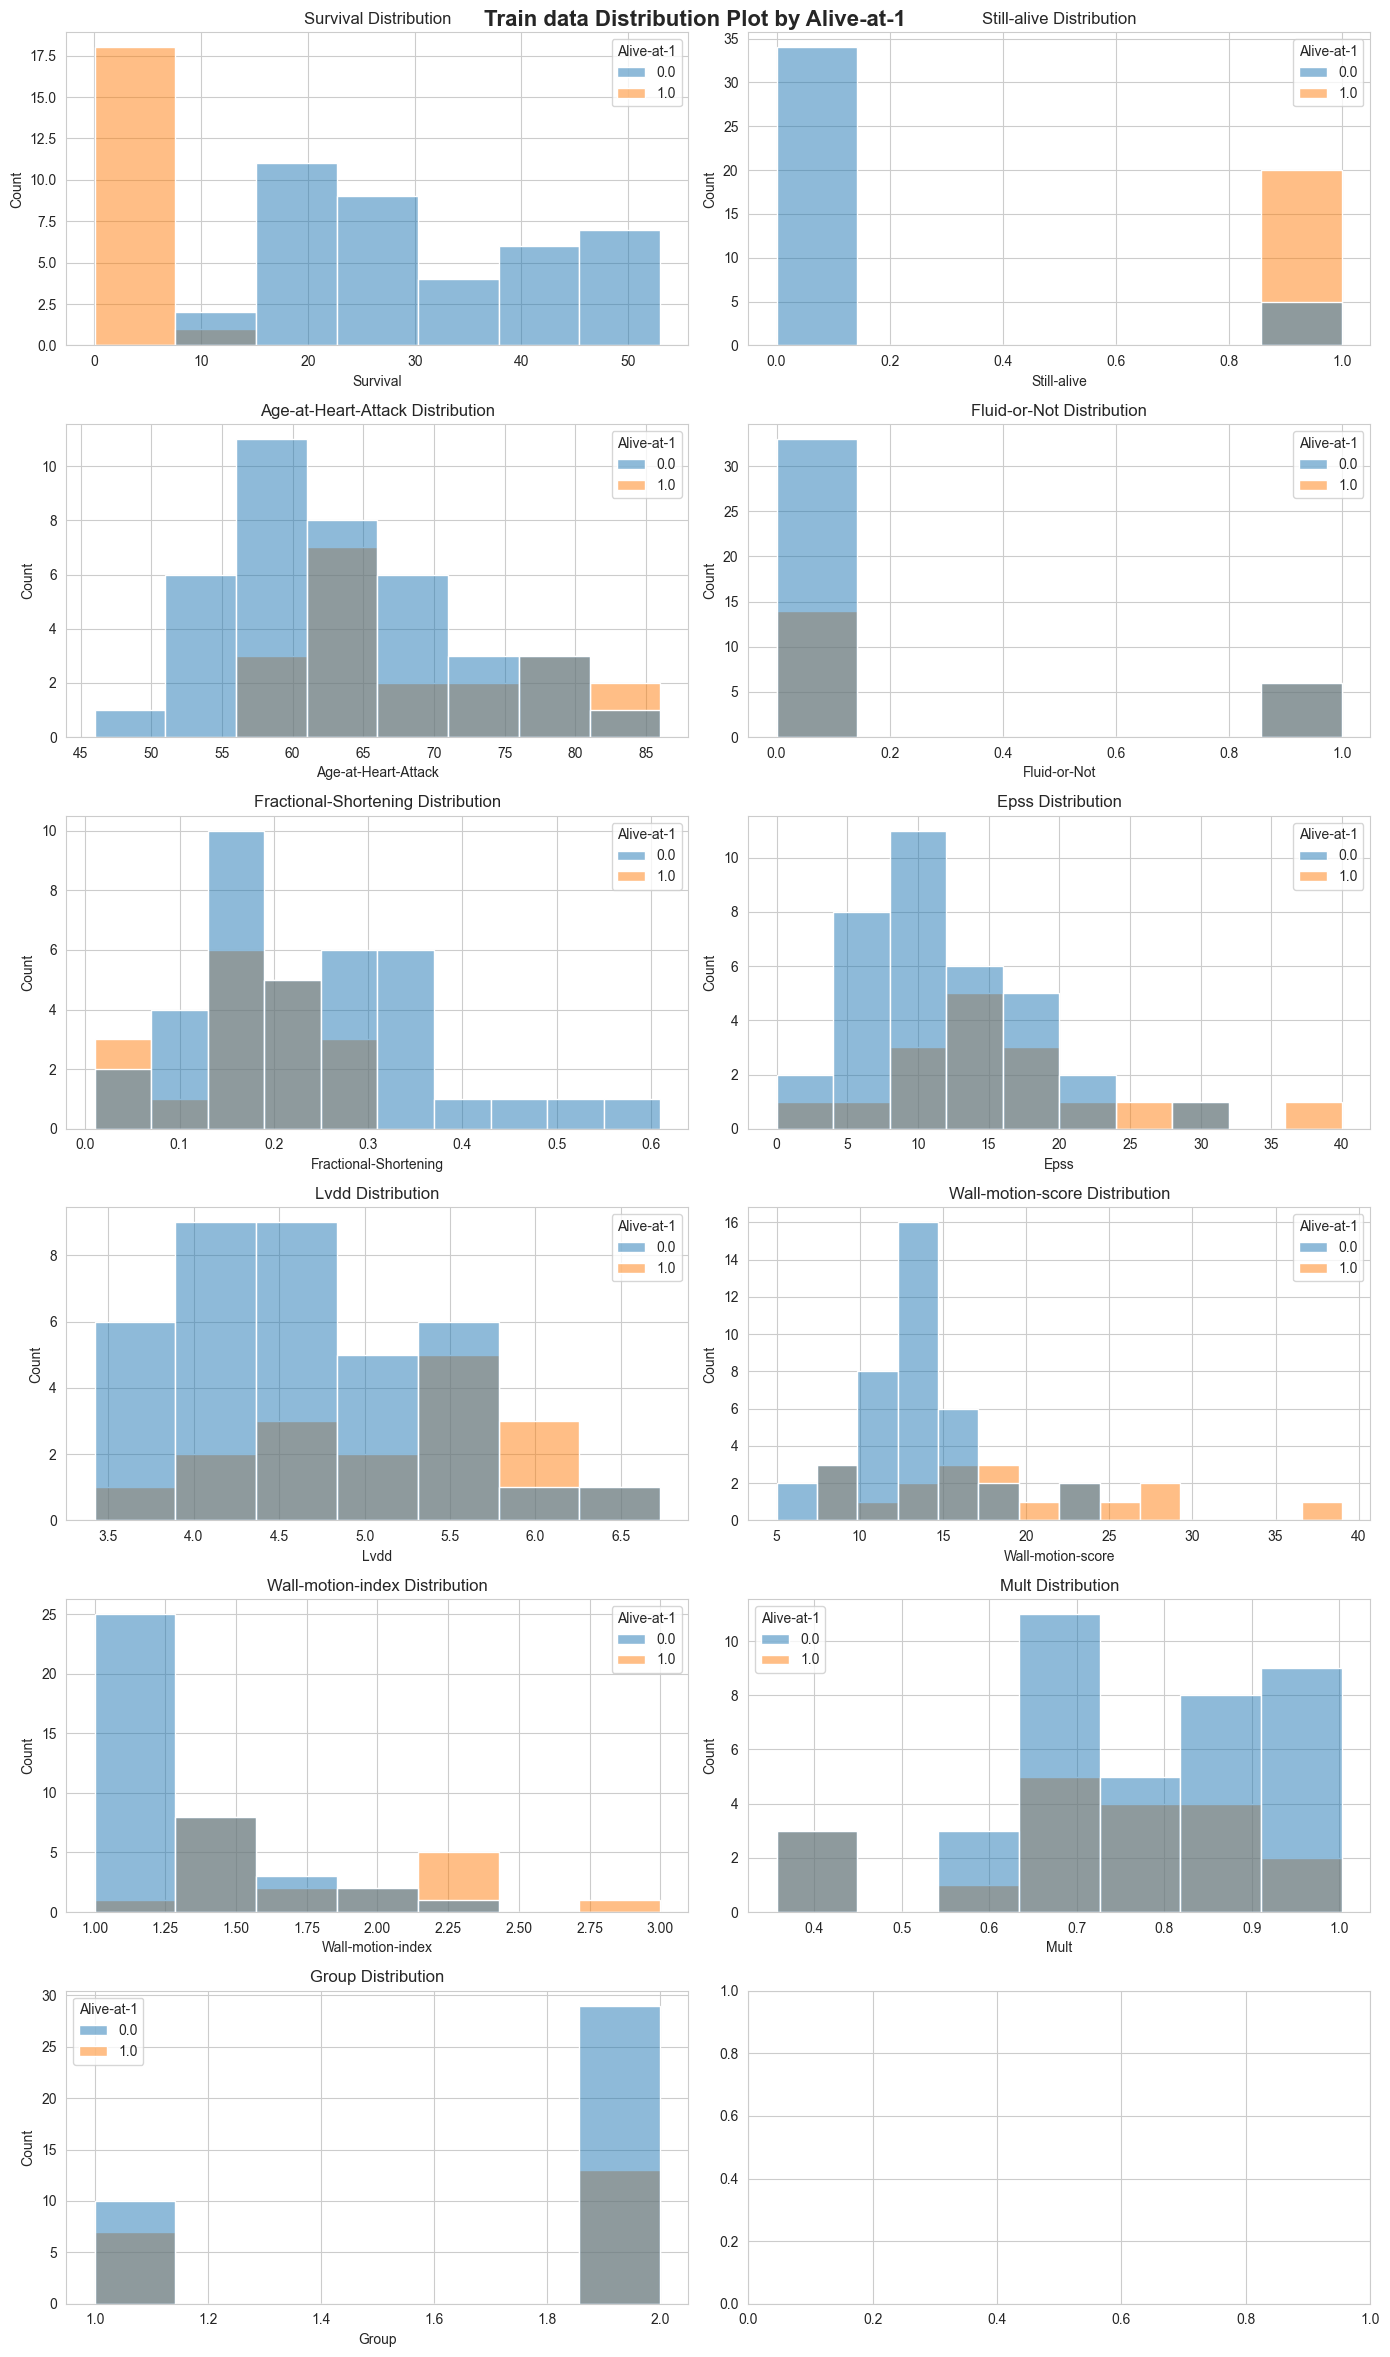

In [15]:
def plot_distribution(df, hue, title='', drop_cols=[]):
    sns.set_style('whitegrid')

    cols = df.columns.drop([hue] + drop_cols)
    n_cols = 2
    n_rows = (len(cols) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 4*n_rows))

    for i, var_name in enumerate(cols):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        # sns.histplot(data=df, x=var_name, kde=True, ax=ax, hue=hue) # sns.distplot(df_train[var_name], kde=True, ax=ax, label='Train')
        sns.histplot(data=df, x=var_name, kde=False, ax=ax, hue=hue)
        ax.set_title(f'{var_name} Distribution')

    fig.suptitle(f'{title} Distribution Plot by {hue}', fontweight='bold', fontsize=16)
    plt.tight_layout()
    plt.show()
    

plot_distribution(df_train, hue=target_col, title='Train data')
    
# plot_distribution(df_test, hue=target_col, title='Test data')
# plot_distribution(original, hue='Sex', title='Original data')

* Heart attack at age 50 to 60 is very critical and dangerous.
* If your blood is not fluid heart attack become more dangerous for you.
* Higher Wall-motion-index higher chance to alive-at-1

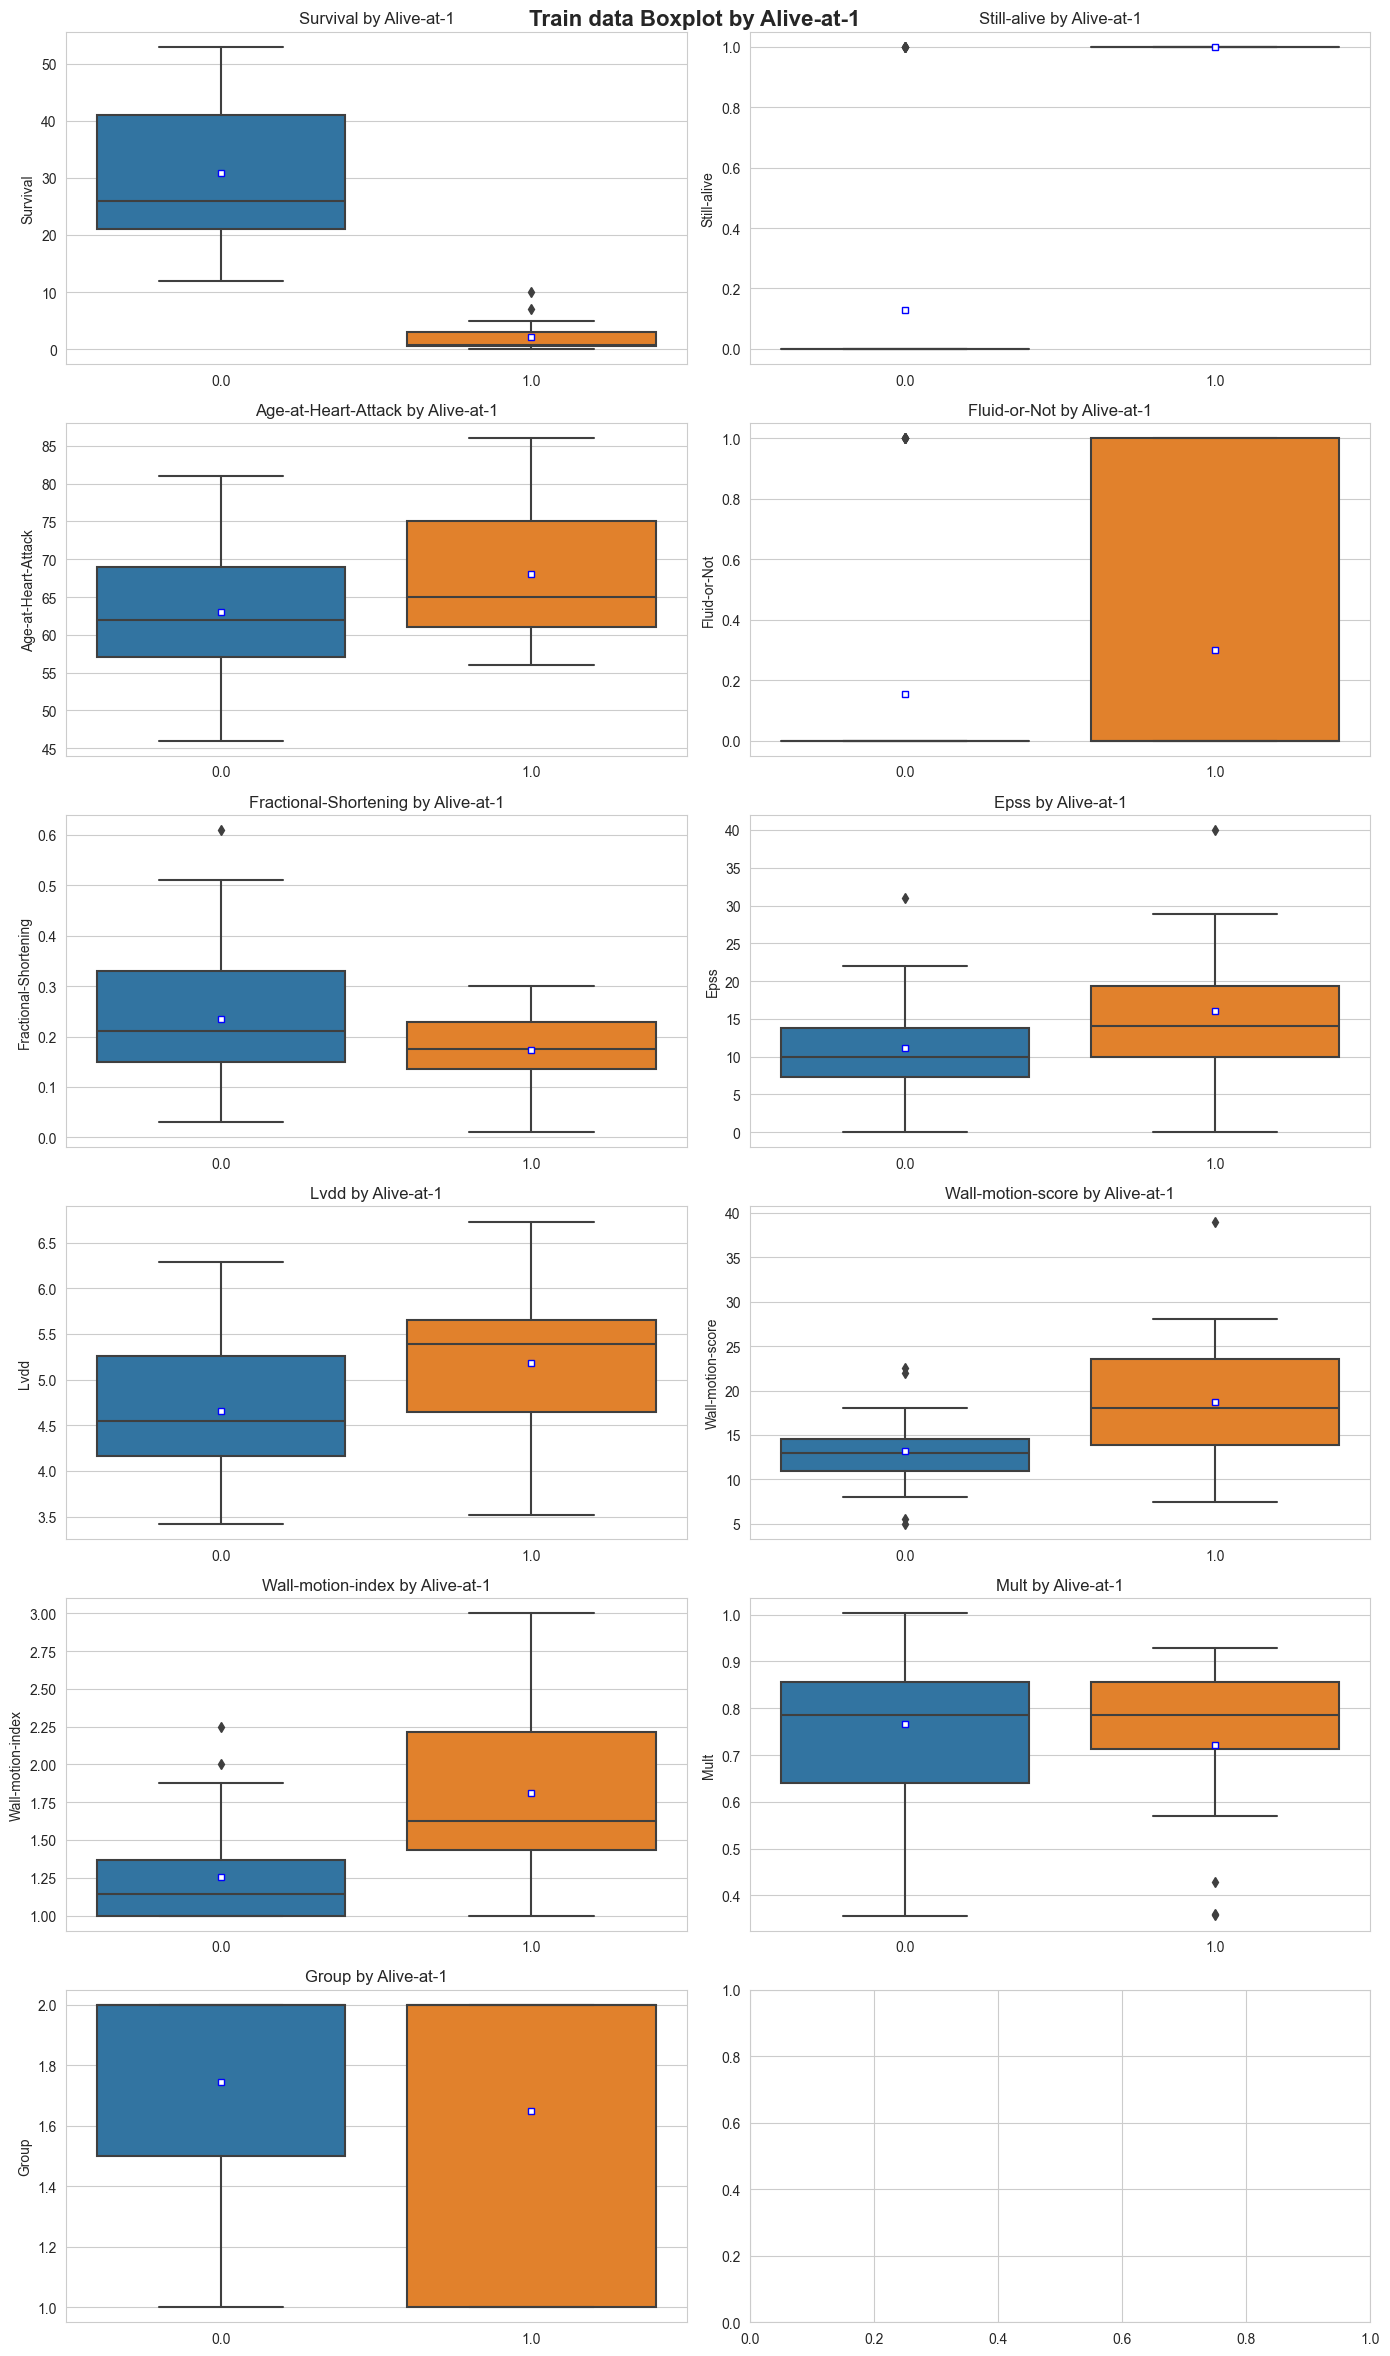

In [16]:
def plot_boxplot(df, hue, title='', drop_cols=[], n_cols=3):
    sns.set_style('whitegrid')

    cols = df.columns.drop(hue)
    cols = cols.drop(drop_cols)
    num_cols = [col for col in cols if col not in cat_cols]
    n_rows = (len(num_cols) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 4*n_rows))

    for i, var_name in enumerate(num_cols):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        sns.boxplot(data=df, x=hue, y=var_name, ax=ax, showmeans=True, 
                    meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue", "markersize":"5"})
        ax.set_title(f'{var_name} by {hue}')
        ax.set_xlabel('')

    fig.suptitle(f'{title} Boxplot by {hue}', fontweight='bold', fontsize=16)
    plt.tight_layout()
    plt.show()


plot_boxplot(df_train, hue=target_col, title='Train data', n_cols=2)
# plot_boxplot(df_test, hue=target_col, title='Test data', n_cols=2)

In [17]:
df_train[(df_train['Still-alive'] == 0) & (df_train[target_col] == 1 )] # No wrong data.

,Survival,Still-alive,Age-at-Heart-Attack,Fluid-or-Not,Fractional-Shortening,Epss,Lvdd,Wall-motion-score,Wall-motion-index,Mult,Group,Alive-at-1


In [18]:
laterDied = df_train[(df_train['Still-alive'] == 1) & (df_train[target_col] == 0 )] 

laterDied

,Survival,Still-alive,Age-at-Heart-Attack,Fluid-or-Not,Fractional-Shortening,Epss,Lvdd,Wall-motion-score,Wall-motion-index,Mult,Group,Alive-at-1
4,19.0,1.0,57.0,0.0,0.16,22.0,5.750,18.0,2.250,0.571,1.0,0.0
46,19.5,1.0,81.0,0.0,0.12,NaN,NaN,9.0,1.250,0.570,2.0,0.0
96,40.0,1.0,74.0,0.0,0.20,4.8,4.560,12.5,1.040,0.857,2.0,0.0
18,22.0,1.0,66.0,0.0,0.09,17.0,5.819,8.0,1.333,0.429,1.0,0.0
47,20.0,1.0,59.0,0.0,0.03,21.3,6.290,17.0,1.310,0.928,2.0,0.0


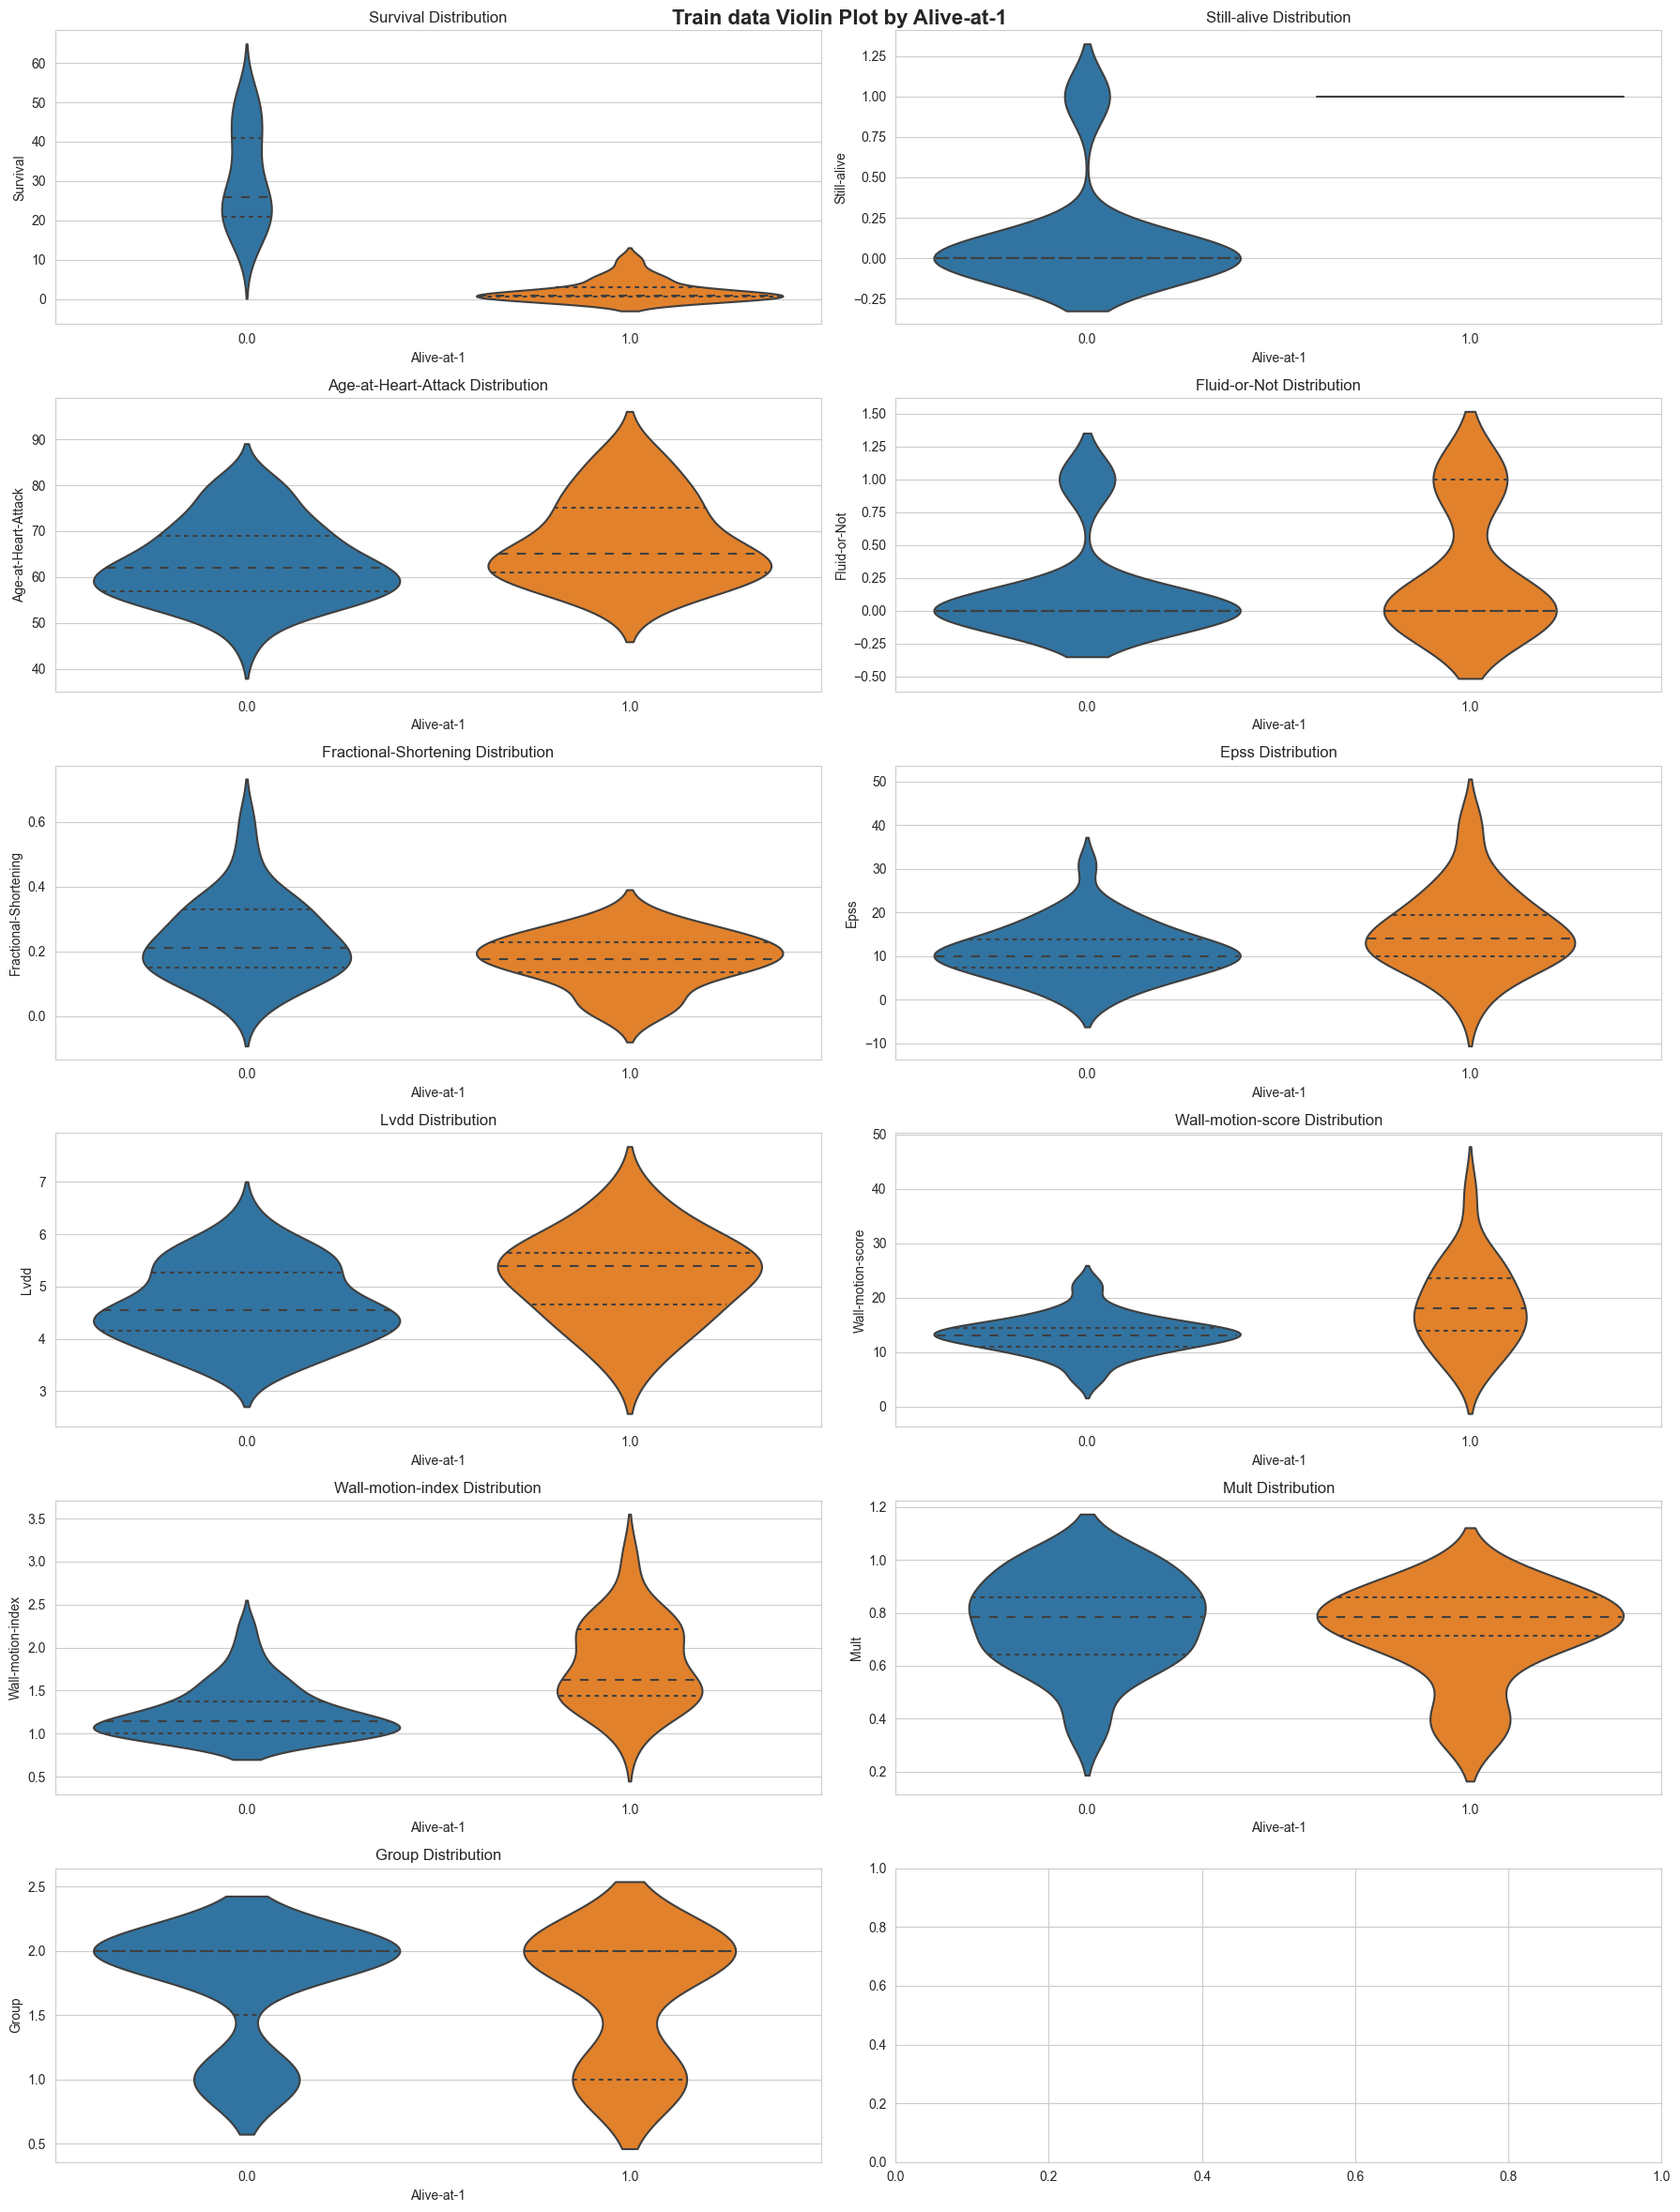

In [19]:
def plot_violinplot(df, hue, title='', drop_cols=[], n_cols=2):
    sns.set_style('whitegrid')

    cols = df.columns.drop([hue] + drop_cols)
    num_cols = [col for col in cols if col not in cat_cols]
    n_rows = (len(num_cols) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows))

    for i, var_name in enumerate(num_cols):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        sns.violinplot(data=df, x=hue, y=var_name, ax=ax, inner='quartile')
        ax.set_title(f'{var_name} Distribution')

    fig.suptitle(f'{title} Violin Plot by {hue}', fontweight='bold', fontsize=16)
    plt.tight_layout()
    plt.show()

plot_violinplot(df_train, hue=target_col, title='Train data', n_cols=2)

# Feature Engineering

In [20]:
# Choose the tactics

df_train = df_train.drop('Mult' , axis= 1)
df_train = df_train.drop('Group' , axis= 1)
df_train = df_train.drop('Wall-motion-score' , axis= 1)

df_valid = df_valid.drop('Mult' , axis= 1)
df_valid = df_valid.drop('Group' , axis= 1)
df_valid = df_valid.drop('Wall-motion-score' , axis= 1)

df_test = df_test.drop('Mult' , axis= 1)
df_test = df_test.drop('Group' , axis= 1)
df_test = df_test.drop('Wall-motion-score' , axis= 1)

In [21]:
df_train

,Survival,Still-alive,Age-at-Heart-Attack,Fluid-or-Not,Fractional-Shortening,Epss,Lvdd,Wall-motion-index,Alive-at-1
68,47.00,0.0,65.0,0.0,0.360,8.800,5.780,1.000,0.0
22,0.50,1.0,73.0,0.0,0.230,12.733,6.060,1.500,1.0
36,16.00,0.0,63.0,1.0,NaN,NaN,5.310,1.000,0.0
9,25.00,0.0,54.0,0.0,0.140,13.000,4.490,1.190,0.0
62,26.00,0.0,72.0,0.0,0.187,12.000,5.020,1.180,0.0
14,0.50,1.0,62.0,0.0,0.120,23.000,5.800,2.330,1.0
10,10.00,1.0,77.0,0.0,0.130,16.000,4.230,1.800,1.0
81,27.00,0.0,54.0,1.0,0.070,16.800,4.160,1.500,0.0
98,5.00,1.0,65.0,1.0,0.160,8.500,5.470,1.450,1.0
12,52.00,0.0,73.0,0.0,0.330,6.000,4.000,1.000,0.0


# Functions(Utils)

In [22]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score , confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score , roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from imblearn.over_sampling import SMOTE , ADASYN


class fonks:
    """
    Class'ın amacı:
    - Sıkça kullanılacak fonksiyonları oluşturmak ve kolayca çağırmak.
    - Daha düzenli ve değiştirilebilir bir programlama yapmak.
    """
    
    label = target_col
    
    def overSample(X , y , tactic = 'smote'):
        if tactic == 'smote':
            smote = SMOTE()
            X_resampled , y_resampled = smote.fit_resample(X , y)
            return X_resampled , y_resampled
        elif tactic == 'adasyn':
            adasyn = ADASYN()
            X_resampled , y_resampled = adasyn.fit_resample(X , y)
            return X_resampled , y_resampled
            
    
    def trainTest(X , y , test_size = 0.2 , stratify = None):
        """
        Alınan datayı istenen oranda Train & Test şeklinde bölüp X_train , X_test , y_train , y_test adındaki 4 değişken döndürür.

        Parameters
        ----------
        data : pandas.DataFrame
            Train & Test olarak bölünecek veri seti.
        label : str, optional
            Hedef değişkenin adı, by default 'Knowledge'.
        test_size : float, optional
            Test veri setinin boyutu, by default 0.2.

        Returns
        -------
        tuple
            X_train, X_test, y_train, y_test
        """

        if stratify == 'y' :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53 , stratify=y)
        else :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53)
        
        return X_train, X_test, y_train,y_test


    def simple_scores(y_train, y_train_pred, y_test, y_pred, name='Model' , task = 'class'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Alınan acc, f1 ve precision skorlarını yazdırır.
        Hem Regression hem Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Görevin type'ı 'reg' or 'class'
            
        Returns
        -------
        print
            Train Acc , Train F1 , Train Precision , Test Acc , Test F1 , Test Precision
        """
        
        
        if task == 'class':
            print(f'{name} Train Accuracy : {accuracy_score(y_train , y_train_pred)}')
            print(f'{name} Train Recall : {recall_score(y_train, y_train_pred, pos_label=1)}')
            print(f'{name} Train Precision : {precision_score(y_train , y_train_pred, pos_label=1)}')
            print(f'{name} Train F1 : {f1_score(y_train , y_train_pred , pos_label=1)}')
            
            
            print("\n****************\n")
            
            print(f'{name} Valid Accuracy : {accuracy_score(y_test , y_pred)}')
            print(f'{name} Valid Recall : {recall_score(y_test, y_pred, pos_label=1)}')
            print(f'{name} Valid Precision : {precision_score(y_test , y_pred, pos_label=1)}')
            print(f'{name} Valid F1 : {f1_score(y_test , y_pred, pos_label=1)}')
        elif task == 'reg':
            print(f'{name} Train R2 : {r2_score(y_train , y_train_pred)}')
            print(f'{name} Train Mae : {mean_absolute_error(y_train, y_train_pred)}')
            print(f'{name} Train RMSE : {mean_squared_error(y_train , y_train_pred)**0.5}')
            print(f'{name} Train MSE : {mean_squared_error(y_train , y_train_pred)}')
            
            
            print("\n****************\n")
            
            print(f'{name} Valid R2 : {r2_score(y_test , y_pred)}')
            print(f'{name} Valid Mae : {mean_absolute_error(y_test, y_pred)}')
            print(f'{name} Valid RMSE : {mean_squared_error(y_test , y_pred)**0.5}')
            print(f'{name} Valid MSE : {mean_squared_error(y_test , y_pred)}')
        
    def get_r2_score(y_true, y_pred):
        return r2_score(y_true,y_pred)
    def get_mae_score(y_true, y_pred):
        return mean_absolute_error(y_true,y_pred)
    def get_rmse_score(y_true, y_pred):
        return mean_squared_error(y_true,y_pred)**0.5
    def get_mse_score(y_true, y_pred):
        return mean_squared_error(y_true,y_pred)
        
        
    def get_acc_score(y_true, y_pred):
        return accuracy_score(y_true , y_pred)    
    def get_f1_score(y_true, y_pred):
        return f1_score(y_true , y_pred , pos_label=1)
    
    def get_recall(y_true, y_pred):
        return recall_score(y_true, y_pred, pos_label=1)
    
    def get_roc_auc(y_true, y_pred):
        return roc_auc_score(y_true, y_pred)
    
    
    def eval_metric(y_train, y_train_pred, y_test, y_pred, name='Model'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Confusion_matrix ve Classification_report'u yazdırır..
        Sadece Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Görevin type'ı 'reg' or 'class'            
            
        Returns
        -------
        print
            Train Confusion_matrix , Train Classification_report , Test Confusion_matrix , Test Classification_report
        """
        
        print(f"Valid_Set {name}")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print()
        print(f"Train_Set {name}")
        print(confusion_matrix(y_train, y_train_pred))
        print(classification_report(y_train, y_train_pred))         
        
    

    def train_test_df(y_train, y_train_pred, y_test, y_pred, name='Model' , task='classification'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Accuracy, Recall, Precision,  yazdırır..
        Hem Regression hem Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Datamızın task'i, 'reg' or 'class'
            
        Returns
        -------
        print
            Train Accuracy , Train Recall , Train Precision , Train F1 , Test Accuracy , Test Recall , Test Precision , Test F1
        """
        
        
        if task == 'classification':
            scores = {name+"_train": {"Accuracy" : accuracy_score(y_train, y_train_pred),
            "Recall" : recall_score(y_train, y_train_pred , pos_label=1),
            "Precision" : precision_score(y_train, y_train_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_train, y_train_pred , pos_label=1))},
                    
            name+"_valid": {"Accuracy" : accuracy_score(y_test, y_pred),
            "Recall" : recall_score(y_test, y_pred , pos_label=1),
            "Precision" : precision_score(y_test, y_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_test, y_pred , pos_label=1))}}
            return pd.DataFrame(scores)
        
        
        
        if task == 'reg':
            
            scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
            "mae" : mean_absolute_error(y_train, y_train_pred),
            "mse" : mean_squared_error(y_train, y_train_pred),
            "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
                    
            name+"_valid": {"R2" : r2_score(y_test, y_pred),
            "mae" : mean_absolute_error(y_test, y_pred),
            "mse" : mean_squared_error(y_test, y_pred),
            "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
            return pd.DataFrame(scores)

# Usage

1) We part df_train to X_train & y_train
2) We also part df_test to X_test & y_test (y_test full nan)

3) We will use KNNImputer to impute nan values for X_train and X_test

In [23]:
train = df_train.copy()
valid = df_valid.copy()
test = df_test.copy()

X_train = train.drop([target_col], axis=1)
y_train = train[target_col]

X_val = valid.drop([target_col], axis=1)
y_val = valid[target_col]

X_test = test.drop([target_col], axis=1)
y_test = test[target_col] # Full NaN

In [24]:
X_train.isna().sum()

Survival                 1
Still-alive              0
Age-at-Heart-Attack      1
Fluid-or-Not             0
Fractional-Shortening    4
Epss                     7
Lvdd                     5
Wall-motion-index        1
dtype: int64

In [25]:
X_val.isna().sum()

Survival                 0
Still-alive              0
Age-at-Heart-Attack      0
Fluid-or-Not             0
Fractional-Shortening    0
Epss                     1
Lvdd                     1
Wall-motion-index        0
dtype: int64

In [26]:
X_test.isna().sum()

Survival                 1
Still-alive              1
Age-at-Heart-Attack      4
Fluid-or-Not             1
Fractional-Shortening    4
Epss                     7
Lvdd                     5
Wall-motion-index        0
dtype: int64

In [27]:
# KNNImputer for NaN values on train and test features.
from sklearn.impute import KNNImputer

imputer_train = KNNImputer(n_neighbors=5)
X_train_imputed = imputer_train.fit_transform(X_train)

imputer_valid = KNNImputer(n_neighbors=5)
X_val_imputed = imputer_valid.fit_transform(X_val)

imputer_test = KNNImputer(n_neighbors=5)
X_test_imputed = imputer_test.fit_transform(X_test)

X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_val = pd.DataFrame(X_val_imputed, columns=X_val.columns)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)

In [28]:
print(f"X_train shape : {X_train.shape}")
print(f"X_valid shape : {X_val.shape}")
print(f"X_test shape : {X_test.shape}")

X_train shape : (59, 8)
X_valid shape : (15, 8)
X_test shape : (58, 8)


In [29]:
y_train.value_counts()

0.0    39
1.0    20
Name: Alive-at-1, dtype: int64

# Data Splitting

In [86]:
from sklearn.model_selection import StratifiedKFold, KFold

class Splitter:
    def __init__(self, kfold=True, n_splits=5, cat_df=pd.DataFrame(), test_size=0.5):
        self.n_splits = n_splits
        self.kfold = kfold
        self.cat_df = cat_df
        self.test_size = test_size

    def split_data(self, X, y, random_state_list):
        if self.kfold == 'skf':
            for random_state in random_state_list:
                kf = StratifiedKFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, self.cat_df):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val, val_index
        elif self.kfold:
            for random_state in random_state_list:
                kf = KFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, y):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val, val_index
        else:
            for random_state in random_state_list:
                X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=self.test_size, random_state=random_state)
                yield X_train, X_val, y_train, y_val

# Define Models

In [31]:
# Optuna
trials = 100

# Gaussian NB

In [32]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

nb_train_pred = nb.predict(X_train)
nb_pred = nb.predict(X_val)

fonks.simple_scores(y_train, nb_train_pred , y_val , nb_pred)

Model Train Accuracy : 0.9322033898305084
Model Train Recall : 1.0
Model Train Precision : 0.8333333333333334
Model Train F1 : 0.9090909090909091

****************

Model Valid Accuracy : 1.0
Model Valid Recall : 1.0
Model Valid Precision : 1.0
Model Valid F1 : 1.0


In [33]:
fonks.eval_metric(y_train, nb_train_pred , y_val , nb_pred , 'NB')

Valid_Set NB
[[11  0]
 [ 0  4]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15


Train_Set NB
[[35  4]
 [ 0 20]]
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        39
         1.0       0.83      1.00      0.91        20

    accuracy                           0.93        59
   macro avg       0.92      0.95      0.93        59
weighted avg       0.94      0.93      0.93        59



In [34]:
nb_acc = fonks.get_acc_score(y_val , nb_pred)
nb_f1 = fonks.get_f1_score(y_val , nb_pred )
nb_recall = fonks.get_recall(y_val , nb_pred)
nb_rocauc = fonks.get_roc_auc(y_val , nb_pred)
# nb_rocauc = roc_auc_score(y_test, nb_pred, multi_class='ovo')
# nb_rocauc = 0.98

nb_df = fonks.train_test_df(y_train, nb_train_pred , y_val , nb_pred , 'NB')
nb_df

,NB_train,NB_valid
Accuracy,0.932203,1.0
Recall,1.000000,1.0
Precision,0.833333,1.0
F1,0.953463,1.0


# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth= 3 , max_features= 8 , min_samples_split= 3)
# dt = dt_grid.best_estimator_
dt.fit(X_train, y_train)

dt_train_pred = dt.predict(X_train)
dt_pred = dt.predict(X_val)

fonks.simple_scores(y_train, dt_train_pred , y_val , dt_pred)

Model Train Accuracy : 1.0
Model Train Recall : 1.0
Model Train Precision : 1.0
Model Train F1 : 1.0

****************

Model Valid Accuracy : 0.8666666666666667
Model Valid Recall : 1.0
Model Valid Precision : 0.6666666666666666
Model Valid F1 : 0.8


In [36]:
fonks.eval_metric(y_train, dt_train_pred , y_val , dt_pred , 'DT')

Valid_Set DT
[[9 2]
 [0 4]]
              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90        11
         1.0       0.67      1.00      0.80         4

    accuracy                           0.87        15
   macro avg       0.83      0.91      0.85        15
weighted avg       0.91      0.87      0.87        15


Train_Set DT
[[39  0]
 [ 0 20]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        39
         1.0       1.00      1.00      1.00        20

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [37]:
dt_acc = fonks.get_acc_score(y_val , dt_pred)
dt_f1 = fonks.get_f1_score(y_val , dt_pred)
dt_recall = fonks.get_recall(y_val , dt_pred)
dt_rocauc = fonks.get_roc_auc(y_val , dt_pred)
# dt_rocauc = roc_auc_score(np.array(y_test.values), dt_pred, multi_class='ovr' , average='micro')

dt_df = fonks.train_test_df(y_train, dt_train_pred , y_val , dt_pred , 'DT')
all_df = pd.concat([nb_df , dt_df] , axis = 1)
all_df

,NB_train,NB_valid,DT_train,DT_valid
Accuracy,0.932203,1.0,1.0,0.866667
Recall,1.000000,1.0,1.0,1.000000
Precision,0.833333,1.0,1.0,0.666667
F1,0.953463,1.0,1.0,0.894427


# KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(5)

knn.fit(X_train, y_train)

knn_train_pred = knn.predict(X_train)
knn_pred = knn.predict(X_val)

fonks.simple_scores(y_train, knn_train_pred , y_val , knn_pred)

Model Train Accuracy : 0.9830508474576272
Model Train Recall : 0.95
Model Train Precision : 1.0
Model Train F1 : 0.9743589743589743

****************

Model Valid Accuracy : 0.9333333333333333
Model Valid Recall : 1.0
Model Valid Precision : 0.8
Model Valid F1 : 0.888888888888889


In [39]:
fonks.eval_metric(y_train, knn_train_pred , y_val , knn_pred , 'KNN')

Valid_Set KNN
[[10  1]
 [ 0  4]]
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        11
         1.0       0.80      1.00      0.89         4

    accuracy                           0.93        15
   macro avg       0.90      0.95      0.92        15
weighted avg       0.95      0.93      0.94        15


Train_Set KNN
[[39  0]
 [ 1 19]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        39
         1.0       1.00      0.95      0.97        20

    accuracy                           0.98        59
   macro avg       0.99      0.97      0.98        59
weighted avg       0.98      0.98      0.98        59



In [40]:
knn_acc = fonks.get_acc_score(y_val , knn_pred)
knn_f1 = fonks.get_f1_score(y_val , knn_pred)
knn_recall = fonks.get_recall(y_val , knn_pred )
knn_rocauc = fonks.get_roc_auc(y_val , knn_pred)

knn_df = fonks.train_test_df(y_train, knn_train_pred , y_val , knn_pred , 'KNN')
all_df = pd.concat([all_df , knn_df] , axis = 1)
all_df

,NB_train,NB_valid,DT_train,DT_valid,KNN_train,KNN_valid
Accuracy,0.932203,1.0,1.0,0.866667,0.983051,0.933333
Recall,1.000000,1.0,1.0,1.000000,0.950000,1.000000
Precision,0.833333,1.0,1.0,0.666667,1.000000,0.800000
F1,0.953463,1.0,1.0,0.894427,0.987096,0.942809


# LogisticRegression

In [41]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(solver = 'liblinear' , penalty= 'l1' , C=25 , max_iter=10000) 
# log = log_grid.best_estimator_
log.fit(X_train , y_train)

log_train_pred = log.predict(X_train)
log_pred = log.predict(X_val)

fonks.simple_scores(y_train, log_train_pred , y_val , log_pred , 'Log')

Log Train Accuracy : 1.0
Log Train Recall : 1.0
Log Train Precision : 1.0
Log Train F1 : 1.0

****************

Log Valid Accuracy : 1.0
Log Valid Recall : 1.0
Log Valid Precision : 1.0
Log Valid F1 : 1.0


In [42]:
fonks.eval_metric(y_train, log_train_pred , y_val , log_pred , 'Log')

Valid_Set Log
[[11  0]
 [ 0  4]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15


Train_Set Log
[[39  0]
 [ 0 20]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        39
         1.0       1.00      1.00      1.00        20

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [43]:
log_acc = fonks.get_acc_score(y_val , log_pred)
log_f1 = fonks.get_f1_score(y_val , log_pred)
log_recall = fonks.get_recall(y_val , log_pred)
log_rocauc = fonks.get_roc_auc(y_val , log_pred)

log_df = fonks.train_test_df(y_train, log_train_pred , y_val , log_pred , 'Log')
all_df = pd.concat([all_df, log_df] , axis = 1)
all_df 

,NB_train,NB_valid,DT_train,DT_valid,KNN_train,KNN_valid,Log_train,Log_valid
Accuracy,0.932203,1.0,1.0,0.866667,0.983051,0.933333,1.0,1.0
Recall,1.000000,1.0,1.0,1.000000,0.950000,1.000000,1.0,1.0
Precision,0.833333,1.0,1.0,0.666667,1.000000,0.800000,1.0,1.0
F1,0.953463,1.0,1.0,0.894427,0.987096,0.942809,1.0,1.0


# SVC

In [44]:
from sklearn.svm import SVC

svc = SVC(kernel = 'linear' , gamma= 'scale' , C= 12 , degree= 2 , max_iter= 10000) 
# svc = svc_grid.best_estimator_
svc.fit(X_train , y_train)

svc_train_pred = svc.predict(X_train)
svc_pred = svc.predict(X_val)

fonks.simple_scores(y_train, svc_train_pred , y_val , svc_pred , 'SVC')

SVC Train Accuracy : 1.0
SVC Train Recall : 1.0
SVC Train Precision : 1.0
SVC Train F1 : 1.0

****************

SVC Valid Accuracy : 1.0
SVC Valid Recall : 1.0
SVC Valid Precision : 1.0
SVC Valid F1 : 1.0


In [45]:
fonks.eval_metric(y_train, svc_train_pred , y_val , svc_pred , 'SVC')

Valid_Set SVC
[[11  0]
 [ 0  4]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15


Train_Set SVC
[[39  0]
 [ 0 20]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        39
         1.0       1.00      1.00      1.00        20

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [46]:
svc_acc = fonks.get_acc_score(y_val , svc_pred)
svc_f1 = fonks.get_f1_score(y_val , svc_pred)
svc_recall = fonks.get_recall(y_val , svc_pred)
svc_rocauc = fonks.get_roc_auc(y_val , svc_pred)

svc_df = fonks.train_test_df(y_train, svc_train_pred , y_val , svc_pred , 'SVC')
all_df = pd.concat([all_df, svc_df] , axis = 1)
all_df 

,NB_train,NB_valid,DT_train,DT_valid,KNN_train,KNN_valid,Log_train,Log_valid,SVC_train,SVC_valid
Accuracy,0.932203,1.0,1.0,0.866667,0.983051,0.933333,1.0,1.0,1.0,1.0
Recall,1.000000,1.0,1.0,1.000000,0.950000,1.000000,1.0,1.0,1.0,1.0
Precision,0.833333,1.0,1.0,0.666667,1.000000,0.800000,1.0,1.0,1.0,1.0
F1,0.953463,1.0,1.0,0.894427,0.987096,0.942809,1.0,1.0,1.0,1.0


# Random Forest

In [47]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

def objective(trial):
    rf_params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_int('max_features', 2, 5),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }

    model = RandomForestClassifier(**rf_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    return f1

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

rf_study = optuna.create_study(direction='maximize')
rf_study.optimize(objective, n_trials=trials)

print(f'Best parameters: {rf_study.best_params}')
print(f'Best score: {rf_study.best_value:.2f}')

[I 2023-07-09 19:39:16,783] A new study created in memory with name: no-name-bb44c598-a0f0-45d8-9a5a-26ea55324917
[I 2023-07-09 19:39:16,865] Trial 0 finished with value: 0.8 and parameters: {'n_estimators': 152, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 5, 'bootstrap': False}. Best is trial 0 with value: 0.8.
[I 2023-07-09 19:39:17,313] Trial 1 finished with value: 1.0 and parameters: {'n_estimators': 719, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 4, 'bootstrap': True}. Best is trial 1 with value: 1.0.
[I 2023-07-09 19:39:17,369] Trial 2 finished with value: 1.0 and parameters: {'n_estimators': 77, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 3, 'bootstrap': True}. Best is trial 1 with value: 1.0.
[I 2023-07-09 19:39:17,874] Trial 3 finished with value: 1.0 and parameters: {'n_estimators': 787, 'max_depth': 2, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 3, 'b

Best parameters: {'n_estimators': 719, 'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 4, 'bootstrap': True}
Best score: 1.00


In [48]:
from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(n_estimators = 630 , max_features= 4 , max_depth = 7 , min_samples_split= 6 , min_samples_leaf=8 , bootstrap=True)
# rf = rf_grid.best_estimator_
rf = RandomForestClassifier(**rf_study.best_params)
rf.fit(X_train , y_train)

rf_train_pred = rf.predict(X_train)
rf_pred = rf.predict(X_val)

fonks.simple_scores(y_train, rf_train_pred , y_val , rf_pred , 'RF')

RF Train Accuracy : 0.9830508474576272
RF Train Recall : 0.95
RF Train Precision : 1.0
RF Train F1 : 0.9743589743589743

****************

RF Valid Accuracy : 1.0
RF Valid Recall : 1.0
RF Valid Precision : 1.0
RF Valid F1 : 1.0


In [49]:
fonks.eval_metric(y_train, rf_train_pred , y_val , rf_pred , 'RF')

Valid_Set RF
[[11  0]
 [ 0  4]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15


Train_Set RF
[[39  0]
 [ 1 19]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        39
         1.0       1.00      0.95      0.97        20

    accuracy                           0.98        59
   macro avg       0.99      0.97      0.98        59
weighted avg       0.98      0.98      0.98        59



In [50]:
rf_acc = fonks.get_acc_score(y_val , rf_pred)
rf_f1 = fonks.get_f1_score(y_val , rf_pred)
rf_recall = fonks.get_recall(y_val , rf_pred)
rf_rocauc = fonks.get_roc_auc(y_val , rf_pred)

rf_df = fonks.train_test_df(y_train, rf_train_pred , y_val , rf_pred , 'RF')
all_df = pd.concat([all_df, rf_df] , axis = 1)
all_df 

,NB_train,NB_valid,DT_train,DT_valid,KNN_train,KNN_valid,Log_train,Log_valid,SVC_train,SVC_valid,RF_train,RF_valid
Accuracy,0.932203,1.0,1.0,0.866667,0.983051,0.933333,1.0,1.0,1.0,1.0,0.983051,1.0
Recall,1.000000,1.0,1.0,1.000000,0.950000,1.000000,1.0,1.0,1.0,1.0,0.950000,1.0
Precision,0.833333,1.0,1.0,0.666667,1.000000,0.800000,1.0,1.0,1.0,1.0,1.000000,1.0
F1,0.953463,1.0,1.0,0.894427,0.987096,0.942809,1.0,1.0,1.0,1.0,0.987096,1.0


# GradientBoosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

def objective(trial):
    gb_params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_uniform('max_features', 0.1, 1.0),
        'random_state': 42
    }

    model = GradientBoostingClassifier(**gb_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    return f1

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

gb_study = optuna.create_study(direction='maximize')
gb_study.optimize(objective, n_trials=trials)

print(f'Best parameters: {gb_study.best_params}')
print(f'Best score: {gb_study.best_value:.2f}')

[I 2023-07-09 19:40:53,705] A new study created in memory with name: no-name-24a1cf68-b5ef-4b12-aed7-20dda78eb58b
[I 2023-07-09 19:40:53,873] Trial 0 finished with value: 0.888888888888889 and parameters: {'learning_rate': 0.12047203305594129, 'n_estimators': 747, 'subsample': 0.5968704931911789, 'max_depth': 2, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.9683035949518009}. Best is trial 0 with value: 0.888888888888889.
[I 2023-07-09 19:40:54,002] Trial 1 finished with value: 0.0 and parameters: {'learning_rate': 0.008141200405560415, 'n_estimators': 642, 'subsample': 0.12846730475052526, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 0.5407166320789041}. Best is trial 0 with value: 0.888888888888889.
[I 2023-07-09 19:40:54,063] Trial 2 finished with value: 0.8571428571428571 and parameters: {'learning_rate': 0.012423449559736595, 'n_estimators': 193, 'subsample': 0.2843146047240302, 'max_depth': 3, 'min_samples_split': 8, 'min_sampl

Best parameters: {'learning_rate': 0.433230440402898, 'n_estimators': 689, 'subsample': 0.7747957556808333, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 9, 'max_features': 0.15951411860932146}
Best score: 1.00


In [52]:
from sklearn.ensemble import GradientBoostingClassifier

# gb = GradientBoostingClassifier(n_estimators=200 , min_samples_split=5, max_depth=6 , learning_rate= 1)
# gb = gb_rand.best_estimator_
gb = GradientBoostingClassifier(**gb_study.best_params)
gb.fit(X_train , y_train)

gb_train_pred = gb.predict(X_train)
gb_pred = gb.predict(X_val)

fonks.simple_scores(y_train, gb_train_pred , y_val , gb_pred , 'GB')

GB Train Accuracy : 1.0
GB Train Recall : 1.0
GB Train Precision : 1.0
GB Train F1 : 1.0

****************

GB Valid Accuracy : 1.0
GB Valid Recall : 1.0
GB Valid Precision : 1.0
GB Valid F1 : 1.0


In [53]:
fonks.eval_metric(y_train, gb_train_pred , y_val , gb_pred , 'GB')

Valid_Set GB
[[11  0]
 [ 0  4]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15


Train_Set GB
[[39  0]
 [ 0 20]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        39
         1.0       1.00      1.00      1.00        20

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [55]:
gb_acc = fonks.get_acc_score(y_val , gb_pred)
gb_f1 = fonks.get_f1_score(y_val , gb_pred)
gb_recall = fonks.get_recall(y_val , gb_pred)
gb_rocauc = fonks.get_roc_auc(y_val , gb_pred)

gb_df = fonks.train_test_df(y_train, gb_train_pred , y_val , gb_pred , 'GB')
all_df = pd.concat([all_df, gb_df] , axis = 1)
all_df 

,NB_train,NB_valid,DT_train,DT_valid,KNN_train,KNN_valid,Log_train,Log_valid,SVC_train,SVC_valid,RF_train,RF_valid,GB_train,GB_valid
Accuracy,0.932203,1.0,1.0,0.866667,0.983051,0.933333,1.0,1.0,1.0,1.0,0.983051,1.0,1.0,1.0
Recall,1.000000,1.0,1.0,1.000000,0.950000,1.000000,1.0,1.0,1.0,1.0,0.950000,1.0,1.0,1.0
Precision,0.833333,1.0,1.0,0.666667,1.000000,0.800000,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0
F1,0.953463,1.0,1.0,0.894427,0.987096,0.942809,1.0,1.0,1.0,1.0,0.987096,1.0,1.0,1.0


# XGBoost

In [56]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

def objective(trial):
    xgb_params = {
        'tree_method': 'gpu_hist',
        'predictor': 'gpu_predictor',
        'gpu_id': 0,
        'enable_categorical': True,
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1.0),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 2, 10),
        'gamma': trial.suggest_loguniform('gamma', 0.001, 1.0),
        'eta': trial.suggest_loguniform('eta', 0.001, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.001, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.001, 10.0)
    }

    model = XGBClassifier(**xgb_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    return f1

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

xgb_study = optuna.create_study(direction='maximize')
xgb_study.optimize(objective, n_trials=trials)

print(f'Best parameters: {xgb_study.best_params}')
print(f'Best score: {xgb_study.best_value:.2f}')

[I 2023-07-09 19:42:30,775] A new study created in memory with name: no-name-d02149ef-a469-4f3f-9aed-b9ad4257838d
[I 2023-07-09 19:42:31,396] Trial 0 finished with value: 0.8571428571428571 and parameters: {'learning_rate': 0.20617278410029685, 'n_estimators': 712, 'subsample': 0.5457974207256787, 'colsample_bytree': 0.1205013870804634, 'max_depth': 3, 'min_child_weight': 3, 'gamma': 0.05690509926639346, 'eta': 0.17708817976441585, 'reg_alpha': 0.02197598678867222, 'reg_lambda': 0.051398194920503674}. Best is trial 0 with value: 0.8571428571428571.
[I 2023-07-09 19:42:31,762] Trial 1 finished with value: 0.0 and parameters: {'learning_rate': 0.004809217492117003, 'n_estimators': 643, 'subsample': 0.8490015390523259, 'colsample_bytree': 0.7581281361819127, 'max_depth': 6, 'min_child_weight': 9, 'gamma': 0.4463737690915224, 'eta': 0.38988174138417936, 'reg_alpha': 4.7719492115399476, 'reg_lambda': 0.031891072318305}. Best is trial 0 with value: 0.8571428571428571.
[I 2023-07-09 19:42:32,

Best parameters: {'learning_rate': 0.02236224843594225, 'n_estimators': 435, 'subsample': 0.9902599862420003, 'colsample_bytree': 0.17517666872662008, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.03734997603477209, 'eta': 0.03259216804078043, 'reg_alpha': 0.02747371731102646, 'reg_lambda': 3.591521387429902}
Best score: 1.00


In [57]:
from xgboost import XGBClassifier

# xgb = XGBClassifier(n_estimators = 80 , learning_rate = 1 , max_depth = 3 , subsample = 0.8 , colsample_bytree = 0.5 , enable_categorical = True , tree_method="gpu_hist", gpu_id=0)
# xgb = xgb_grid.best_estimator_
xgb = XGBClassifier(**xgb_study.best_params)
xgb.fit(X_train, y_train)

xgb_train_pred = xgb.predict(X_train)
xgb_pred = xgb.predict(X_val)

fonks.simple_scores(y_train, xgb_train_pred , y_val , xgb_pred , 'XGB')

XGB Train Accuracy : 0.9830508474576272
XGB Train Recall : 0.95
XGB Train Precision : 1.0
XGB Train F1 : 0.9743589743589743

****************

XGB Valid Accuracy : 1.0
XGB Valid Recall : 1.0
XGB Valid Precision : 1.0
XGB Valid F1 : 1.0


In [58]:
fonks.eval_metric(y_train, xgb_train_pred , y_val , xgb_pred , 'XGB')

Valid_Set XGB
[[11  0]
 [ 0  4]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15


Train_Set XGB
[[39  0]
 [ 1 19]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        39
         1.0       1.00      0.95      0.97        20

    accuracy                           0.98        59
   macro avg       0.99      0.97      0.98        59
weighted avg       0.98      0.98      0.98        59



In [59]:
xgb_acc = fonks.get_acc_score(y_val , xgb_pred)
xgb_f1 = fonks.get_f1_score(y_val , xgb_pred)
xgb_recall = fonks.get_recall(y_val , xgb_pred)
xgb_rocauc = fonks.get_roc_auc(y_val , xgb_pred)

xgb_df = fonks.train_test_df(y_train, xgb_train_pred , y_val , xgb_pred , 'XGB')
all_df = pd.concat([all_df, xgb_df] , axis = 1)
all_df 

,NB_train,NB_valid,DT_train,DT_valid,KNN_train,KNN_valid,Log_train,Log_valid,SVC_train,SVC_valid,RF_train,RF_valid,GB_train,GB_valid,XGB_train,XGB_valid
Accuracy,0.932203,1.0,1.0,0.866667,0.983051,0.933333,1.0,1.0,1.0,1.0,0.983051,1.0,1.0,1.0,0.983051,1.0
Recall,1.000000,1.0,1.0,1.000000,0.950000,1.000000,1.0,1.0,1.0,1.0,0.950000,1.0,1.0,1.0,0.950000,1.0
Precision,0.833333,1.0,1.0,0.666667,1.000000,0.800000,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0
F1,0.953463,1.0,1.0,0.894427,0.987096,0.942809,1.0,1.0,1.0,1.0,0.987096,1.0,1.0,1.0,0.987096,1.0


# LightGBM

In [60]:
from lightgbm import LGBMClassifier

def objective(trial):
    lgbm_params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1.0),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 2, 10),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.001, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.001, 10.0),
        'random_state': 42
    }

    model = LGBMClassifier(**lgbm_params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    return f1

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

lgb_study = optuna.create_study(direction='maximize')
lgb_study.optimize(objective, n_trials=trials)

print(f'Best parameters: {lgb_study.best_params}')
print(f'Best score: {lgb_study.best_value:.2f}')

[I 2023-07-09 19:43:57,005] A new study created in memory with name: no-name-f637beae-3c0b-4edd-a918-b2203affaaec
[I 2023-07-09 19:43:57,024] Trial 0 finished with value: 1.0 and parameters: {'learning_rate': 0.035023173310604706, 'n_estimators': 54, 'subsample': 0.2739392848563718, 'colsample_bytree': 0.7140425134192944, 'max_depth': 8, 'min_child_samples': 2, 'reg_alpha': 1.6649346365622357, 'reg_lambda': 0.001797232948212689}. Best is trial 0 with value: 1.0.
[I 2023-07-09 19:43:57,115] Trial 1 finished with value: 1.0 and parameters: {'learning_rate': 0.1452834476537889, 'n_estimators': 660, 'subsample': 0.12596605346166365, 'colsample_bytree': 0.8738840520210472, 'max_depth': 4, 'min_child_samples': 5, 'reg_alpha': 0.0010069978955658833, 'reg_lambda': 0.0031109361914666827}. Best is trial 0 with value: 1.0.
[I 2023-07-09 19:43:57,160] Trial 2 finished with value: 1.0 and parameters: {'learning_rate': 0.11946338030064724, 'n_estimators': 588, 'subsample': 0.19416589693889505, 'cols

Best parameters: {'learning_rate': 0.035023173310604706, 'n_estimators': 54, 'subsample': 0.2739392848563718, 'colsample_bytree': 0.7140425134192944, 'max_depth': 8, 'min_child_samples': 2, 'reg_alpha': 1.6649346365622357, 'reg_lambda': 0.001797232948212689}
Best score: 1.00


In [61]:
from lightgbm import LGBMClassifier

# lgb = LGBMClassifier(n_estimators= 100 , learning_rate = 1 , max_depth = 3 , subsample = 0.7 , colsample_bytree = 0.8)
# lgb = lgb_grid.best_estimator_
lgb = LGBMClassifier(**lgb_study.best_params)
lgb.fit(X_train , y_train)

lgb_train_pred = lgb.predict(X_train)
lgb_pred = lgb.predict(X_val)

fonks.simple_scores(y_train, lgb_train_pred , y_val , lgb_pred , 'LGB')

LGB Train Accuracy : 0.9830508474576272
LGB Train Recall : 0.95
LGB Train Precision : 1.0
LGB Train F1 : 0.9743589743589743

****************

LGB Valid Accuracy : 1.0
LGB Valid Recall : 1.0
LGB Valid Precision : 1.0
LGB Valid F1 : 1.0


In [62]:
fonks.eval_metric(y_train, lgb_train_pred , y_val , lgb_pred , 'LGB')

Valid_Set LGB
[[11  0]
 [ 0  4]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15


Train_Set LGB
[[39  0]
 [ 1 19]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        39
         1.0       1.00      0.95      0.97        20

    accuracy                           0.98        59
   macro avg       0.99      0.97      0.98        59
weighted avg       0.98      0.98      0.98        59



In [63]:
lgb_acc = fonks.get_acc_score(y_val , lgb_pred)
lgb_f1 = fonks.get_f1_score(y_val , lgb_pred)
lgb_recall = fonks.get_recall(y_val , lgb_pred)
lgb_rocauc = fonks.get_roc_auc(y_val , lgb_pred)

lgb_df = fonks.train_test_df(y_train, lgb_train_pred , y_val , lgb_pred , 'LGB')
all_df = pd.concat([all_df, lgb_df] , axis = 1)
all_df 

,NB_train,NB_valid,DT_train,DT_valid,KNN_train,KNN_valid,Log_train,Log_valid,SVC_train,SVC_valid,RF_train,RF_valid,GB_train,GB_valid,XGB_train,XGB_valid,LGB_train,LGB_valid
Accuracy,0.932203,1.0,1.0,0.866667,0.983051,0.933333,1.0,1.0,1.0,1.0,0.983051,1.0,1.0,1.0,0.983051,1.0,0.983051,1.0
Recall,1.000000,1.0,1.0,1.000000,0.950000,1.000000,1.0,1.0,1.0,1.0,0.950000,1.0,1.0,1.0,0.950000,1.0,0.950000,1.0
Precision,0.833333,1.0,1.0,0.666667,1.000000,0.800000,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0
F1,0.953463,1.0,1.0,0.894427,0.987096,0.942809,1.0,1.0,1.0,1.0,0.987096,1.0,1.0,1.0,0.987096,1.0,0.987096,1.0


# CatBoost

In [64]:
from catboost import CatBoostClassifier

def objective(trial):
    catboost_params = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
        'colsample_bylevel': trial.suggest_uniform('colsample_bylevel', 0.1, 1.0),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 2, 10),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.001, 10.0),
        'random_state': 42,
        'eval_metric': 'F1',
        'verbose': False
    }

    model = CatBoostClassifier(**catboost_params)
    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=10, verbose=False)
    y_pred = model.predict(X_val)
    f1 = f1_score(y_val, y_pred)
    return f1

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=34)

cb_study = optuna.create_study(direction='maximize')
cb_study.optimize(objective, n_trials=trials)

print(f'Best parameters: {cb_study.best_params}')
print(f'Best score: {cb_study.best_value:.2f}')

[I 2023-07-09 19:44:52,281] A new study created in memory with name: no-name-ba481076-7426-4d95-bd31-8b1c80988116
[I 2023-07-09 19:44:52,505] Trial 0 finished with value: 1.0 and parameters: {'learning_rate': 0.1095307836164705, 'n_estimators': 88, 'subsample': 0.9077135483944976, 'colsample_bylevel': 0.9778016065543781, 'max_depth': 5, 'min_child_samples': 3, 'reg_lambda': 0.07456623724176066}. Best is trial 0 with value: 1.0.
[I 2023-07-09 19:44:52,556] Trial 1 finished with value: 1.0 and parameters: {'learning_rate': 0.02081705574106385, 'n_estimators': 444, 'subsample': 0.4044027900351982, 'colsample_bylevel': 0.8439361484275458, 'max_depth': 9, 'min_child_samples': 6, 'reg_lambda': 1.1895989613851836}. Best is trial 0 with value: 1.0.
[I 2023-07-09 19:44:52,594] Trial 2 finished with value: 1.0 and parameters: {'learning_rate': 0.0017589809667036172, 'n_estimators': 427, 'subsample': 0.8557406420710726, 'colsample_bylevel': 0.12147463566336344, 'max_depth': 6, 'min_child_samples'

Best parameters: {'learning_rate': 0.1095307836164705, 'n_estimators': 88, 'subsample': 0.9077135483944976, 'colsample_bylevel': 0.9778016065543781, 'max_depth': 5, 'min_child_samples': 3, 'reg_lambda': 0.07456623724176066}
Best score: 1.00


In [65]:
from catboost import CatBoostClassifier

# cb = CatBoostClassifier(iterations= 100 , learning_rate = 0.1 , depth = 3  , eval_metric='Accuracy' , random_state= 53 , task_type="GPU", devices='gpu:0' )
# cb = CatBoostClassifier(iterations= 400 , learning_rate = 0.01 , depth = 3  , eval_metric='Accuracy' , random_state= 53 , task_type="GPU", devices='gpu:0' , cat_features=cat_cols )
# cb = cb_grid.best_estimator_
cb = CatBoostClassifier(**cb_study.best_params)
cb.fit(X_train , y_train , eval_set= (X_val, y_val))

cb_train_pred = cb.predict(X_train)
cb_pred = cb.predict(X_val)

fonks.simple_scores(y_train, cb_train_pred , y_val , cb_pred , 'CatB')

0:	learn: 0.5975860	test: 0.6156212	best: 0.6156212 (0)	total: 308us	remaining: 26.8ms
1:	learn: 0.5223757	test: 0.5519210	best: 0.5519210 (1)	total: 571us	remaining: 24.6ms
2:	learn: 0.4671751	test: 0.4887249	best: 0.4887249 (2)	total: 1.02ms	remaining: 29ms
3:	learn: 0.4169725	test: 0.4403347	best: 0.4403347 (3)	total: 1.46ms	remaining: 30.6ms
4:	learn: 0.3752495	test: 0.3953681	best: 0.3953681 (4)	total: 1.9ms	remaining: 31.6ms
5:	learn: 0.3379626	test: 0.3530566	best: 0.3530566 (5)	total: 2.23ms	remaining: 30.4ms
6:	learn: 0.3041753	test: 0.3196941	best: 0.3196941 (6)	total: 2.56ms	remaining: 29.6ms
7:	learn: 0.2777810	test: 0.2883902	best: 0.2883902 (7)	total: 2.97ms	remaining: 29.7ms
8:	learn: 0.2472555	test: 0.2576201	best: 0.2576201 (8)	total: 3.48ms	remaining: 30.5ms
9:	learn: 0.2224555	test: 0.2342705	best: 0.2342705 (9)	total: 3.82ms	remaining: 29.8ms
10:	learn: 0.1993434	test: 0.2144778	best: 0.2144778 (10)	total: 4.22ms	remaining: 29.6ms
11:	learn: 0.1828771	test: 0.205451

In [66]:
fonks.eval_metric(y_train, cb_train_pred , y_val , cb_pred , 'CatB')

Valid_Set CatB
[[11  0]
 [ 0  4]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15


Train_Set CatB
[[39  0]
 [ 0 20]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        39
         1.0       1.00      1.00      1.00        20

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59



In [67]:
cb_acc = fonks.get_acc_score(y_val , cb_pred)
cb_f1 = fonks.get_f1_score(y_val , cb_pred)
cb_recall = fonks.get_recall(y_val , cb_pred)
cb_rocauc = fonks.get_roc_auc(y_val , cb_pred)

cb_df = fonks.train_test_df(y_train, cb_train_pred , y_val , cb_pred , 'CatB')
all_df = pd.concat([all_df, cb_df] , axis = 1)
all_df 

,NB_train,NB_valid,DT_train,DT_valid,KNN_train,KNN_valid,Log_train,Log_valid,SVC_train,SVC_valid,RF_train,RF_valid,GB_train,GB_valid,XGB_train,XGB_valid,LGB_train,LGB_valid,CatB_train,CatB_valid
Accuracy,0.932203,1.0,1.0,0.866667,0.983051,0.933333,1.0,1.0,1.0,1.0,0.983051,1.0,1.0,1.0,0.983051,1.0,0.983051,1.0,1.0,1.0
Recall,1.000000,1.0,1.0,1.000000,0.950000,1.000000,1.0,1.0,1.0,1.0,0.950000,1.0,1.0,1.0,0.950000,1.0,0.950000,1.0,1.0,1.0
Precision,0.833333,1.0,1.0,0.666667,1.000000,0.800000,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,1.0,1.0
F1,0.953463,1.0,1.0,0.894427,0.987096,0.942809,1.0,1.0,1.0,1.0,0.987096,1.0,1.0,1.0,0.987096,1.0,0.987096,1.0,1.0,1.0


# Ensemble Model

## Define Models

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
class Classifier:
    def __init__(self, n_estimators=2000, device="gpu", random_state=0):
        self.n_estimators = n_estimators
        self.device = device
        self.random_state = random_state
        self.models = self._define_model()
        self.models_name = list(self._define_model().keys())
        self.len_models = len(self.models)
        
    def _define_model(self):
        xgb_params = {
                'n_estimators': 15000,
                'learning_rate': 0.00482382842096919,
                'booster': 'gbtree',
                'lambda': 0.000235366507474591,
                'alpha': 0.0000115977765684837,
                'subsample': 0.35955930593108,
                'colsample_bytree': 0.898528184386095,
                'max_depth': 12,
                'min_child_weight': 8,
                'eta': 0.0000784943239744148,
                'gamma': 1.6661346939401E-07,
                'grow_policy': 'lossguide',
                'n_jobs': -1,
                'objective': 'reg:pseudohubererror', # reg:pseudohubererror
                'eval_metric': 'mae',
                'verbosity': 0,
                'random_state': self.random_state,
            }
            
        if self.device == 'gpu':
            xgb_params['tree_method'] = 'gpu_hist'
            xgb_params['predictor'] = 'gpu_predictor'
            
        
        lgb1_params = {
            'device'            : "gpu" if self.device else "cpu",
            'objective'         : 'regression_l1',
            'metric'            : 'mean_absolute_error',
            'boosting_type'     : 'gbdt',
            'random_state'      : self.random_state,
            'feature_fraction'  : 0.70,
            'learning_rate'     : 0.018,
            'max_depth'         : 16,
            'n_estimators'      : 15_000,
            'num_leaves'        : 80,                    
            'reg_alpha'         : 1.25,
            'reg_lambda'        : 3.5,
            'verbose'           : -1,
        }
        
        cat1_params = {
                    'task_type'           : "CPU",
                    'loss_function'       : 'MAE',
                    'eval_metric'         : 'MAE',
                    'bagging_temperature' : 2.5,
                    'colsample_bylevel'   : 0.8,
                    'iterations'          : 15_000,
                    'learning_rate'       : 0.067,
                    'od_wait'             : 40,
                    'max_depth'           : 9,
                    'l2_leaf_reg'         : 1.575,
                    'min_data_in_leaf'    : 28,
                    'random_strength'     : 0.55, 
                    'max_bin'             : 256,
                    # 'cat_features' : cat_cols
                           }
        
        hist_params = {
            'loss': 'absolute_error',
            'l2_regularization': 0.0104104133357932,
            'early_stopping': True,
            'learning_rate': 0.00627298859709192,
            'max_iter': 20000,
            'n_iter_no_change': 300,
            'max_depth': 16,
            'max_bins': 255,
            'min_samples_leaf': 54,
            'max_leaf_nodes':57,
            'random_state': self.random_state,
            #'categorical_features': []
        }
        
        models = {
#             "lad": LADRegression(),
            "xgb": XGBClassifier(**xgb_study.best_params),
            "lgb": LGBMClassifier(**lgb_study.best_params),
            "cat": CatBoostClassifier(**cb_study.best_params),
            "rf": RandomForestClassifier(**rf_study.best_params),
            "gb": GradientBoostingClassifier(**gb_study.best_params),
            # "xgb": xgb.XGBRegressor(**xgb_params),
            # "lgb": lgb.LGBMRegressor(**lgb1_params),
            # "cat": CatBoostRegressor(**cat1_params),
            # 'hgb': HistGradientBoostingRegressor(**hist_params),
            # "SVR_rbf": SVR(kernel="rbf", gamma="auto"),
#             "SVR_linear": SVR(kernel="linear", gamma="auto"),
#             "Ridge": RidgeCV(),
#             "Lasso": LassoCV(),
#             "KNeighborsRegressor": KNeighborsRegressor(n_neighbors=5, n_jobs=-1),            
            # "RandomForestRegressor": RandomForestRegressor(n_estimators=500, random_state=self.random_state, n_jobs=-1),
#             "SGDRegressor": SGDRegressor(max_iter=2000, early_stopping=True, n_iter_no_change=100, random_state=self.random_state),
            # "MLPRegressor": MLPRegressor(max_iter=500, early_stopping=True, n_iter_no_change=10, random_state=self.random_state),
#             "ExtraTreesRegressor": ExtraTreesRegressor(n_estimators=500, n_jobs=-1, random_state=self.random_state),
#             "PLSRegression": PLSRegression(n_components=10, max_iter=1000),
            #"PassiveAggressiveRegressor": PassiveAggressiveRegressor(max_iter=1000, tol=1e-3, random_state=self.random_state),
#             "TheilSenRegressor": TheilSenRegressor(max_iter=1000, random_state=self.random_state, n_jobs=-1),
            # "GradientBoostingRegressor": GradientBoostingRegressor(**gbd_params),
#             "ARDRegression": ARDRegression(n_iter=1000),
#             "HuberRegressor": HuberRegressor(max_iter=2000)
        }
        
        return models

# Optimizer --> F1 Score

In [69]:
from sklearn.metrics import f1_score
import optuna
import numpy as np
import random
from functools import partial

class OptunaWeights:
    def __init__(self, random_state, n_trials=100):
        self.study = None
        self.weights = None
        self.random_state = random_state
        self.n_trials = n_trials

    def _objective(self, trial, y_true, y_preds):
        # Define the weights for the predictions from each model
        weights = [trial.suggest_float(f"weight{n}", 1e-15, 1) for n in range(len(y_preds))]

        # Calculate the weighted prediction
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=weights)

        # Calculate the score for the weighted prediction
        score = f1_score(y_true, np.round(weighted_pred))
        return score

    def fit(self, y_true, y_preds):
        optuna.logging.set_verbosity(optuna.logging.ERROR)
        sampler = optuna.samplers.CmaEsSampler(seed=self.random_state)
        pruner = optuna.pruners.HyperbandPruner()
        self.study = optuna.create_study(sampler=sampler, pruner=pruner, study_name="OptunaWeights", direction='maximize')
        objective_partial = partial(self._objective, y_true=y_true, y_preds=y_preds)
        self.study.optimize(objective_partial, n_trials=self.n_trials)
        self.weights = [self.study.best_params[f"weight{n}"] for n in range(len(y_preds))]

    def predict(self, y_preds):
        assert self.weights is not None, 'OptunaWeights error, must be fitted before predict'
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=self.weights)
        return weighted_pred

    def fit_predict(self, y_true, y_preds):
        self.fit(y_true, y_preds)
        return self.predict(y_preds)

    def get_weights(self):
        return self.weights

In [70]:
# Settings
kfold = True
n_splits = 5 # 10
n_reapts = 1 # 1
random_state = 34 # Istanbul :)
n_estimators = 9999 # 99999
early_stopping_rounds = 200
n_trials = 2000 # 3000
verbose = False
device = 'gpu'

# Fix seed
random.seed(random_state)
random_state_list = random.sample(range(9999), n_reapts)

# To calculate runtime
def sec_to_minsec(t):
    min_ = int(t / 60)
    sec = int(t - min_*60)
    return min_, sec

In [71]:
X_train.shape

(59, 8)

In [73]:
X_val.shape

(15, 8)

In [74]:
X_test.shape

(58, 8)

In [84]:
X_train = pd.concat([X_train, X_val] , axis = 0)

In [85]:
y_train = pd.concat([y_train, y_val] , axis = 0)

In [75]:
import time
import gc
from copy import deepcopy

from colorama import Style, Fore
blk = Style.BRIGHT + Fore.BLACK
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
res = Style.RESET_ALL

In [87]:
from sklearn.metrics import f1_score

# Initialize an array for storing test predictions
classifier = Classifier(n_estimators, device, random_state)
test_predss = np.zeros((X_test.shape[0]))
oof_predss = np.zeros((X_train.shape[0], n_reapts))
ensemble_score, ensemble_score_ = [], []
weights = []
trained_models = dict(zip([_ for _ in classifier.models_name if ('xgb' in _) or ('lgb' in _) or ('cat' in _)], [[] for _ in range(classifier.len_models)]))
score_dict = dict(zip(classifier.models_name, [[] for _ in range(classifier.len_models)]))

splitter = Splitter(kfold=kfold, n_splits=n_splits)
for i, (X_train_, X_val, y_train_, y_val, val_index) in enumerate(splitter.split_data(X_train, y_train, random_state_list=random_state_list)):
    n = i % n_splits
    m = i // n_splits
            
    # Get a set of classifier models
    classifier = Classifier(n_estimators, device, random_state_list[m])
    models = classifier.models
    
    # Initialize lists to store oof and test predictions for each base model
    oof_preds = []
    test_preds = []
    
    # Loop over each base model and fit it to the training data, evaluate on validation data, and store predictions
    for name, model in models.items():
        best_iteration = None
        start_time = time.time()
        if ('xgb' in name) or ('lgb' in name) or ('cat' in name):
            early_stopping_rounds_ = int(early_stopping_rounds*1.5) if name != 'cat' else early_stopping_rounds
            model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)], early_stopping_rounds=early_stopping_rounds_, verbose=verbose)
            best_iteration = model.best_iteration if name == 'xgb' else model.best_iteration_
        else:
            model.fit(X_train_, y_train_)
        end_time = time.time()
        min_, sec = sec_to_minsec(end_time - start_time)
            
        if name in trained_models.keys():
            trained_models[f'{name}'].append(deepcopy(model))
        
        test_pred = model.predict(X_test).reshape(-1)
        y_val_pred = model.predict(X_val).reshape(-1)
        
        score = f1_score(y_val, y_val_pred.round().astype(int))  # Calculate F1 score instead of MAE
        score_dict[name].append(score)
        print(f'{blu}{name}{res} [FOLD-{n} SEED-{random_state_list[m]}] F1 Score {blu}{score:.5f}{res} | Best iteration {blu}{best_iteration}{res} | {min_}min {sec}s')
        
        oof_preds.append(y_val_pred)
        test_preds.append(test_pred)
    
    # Use Optuna to find the best ensemble weights
    optweights = OptunaWeights(random_state=random_state_list[m], n_trials=n_trials)
    y_val_pred = optweights.fit_predict(y_val.values, oof_preds)
    
    score = f1_score(y_val, y_val_pred.round().astype(int))  # Calculate F1 score instead of MAE
    print(f'{red}>>> Ensemble{res} [FOLD-{n} SEED-{random_state_list[m]}] F1 Score {red}{score:.5f}{res}')
    print(f'{"-" * 60}')
    ensemble_score.append(score)
    weights.append(optweights.weights)
    
    # Predict to X_test by the best ensemble weights
    test_predss += optweights.predict(test_preds) / (n_splits * len(random_state_list))
    oof_predss[X_val.index, m] += optweights.predict(oof_preds)
    
    gc.collect()

xgb [FOLD-0 SEED-8666] F1 Score 1.00000 | Best iteration 431 | 0min 0s
lgb [FOLD-0 SEED-8666] F1 Score 1.00000 | Best iteration 54 | 0min 0s
cat [FOLD-0 SEED-8666] F1 Score 1.00000 | Best iteration 87 | 0min 0s
rf [FOLD-0 SEED-8666] F1 Score 1.00000 | Best iteration None | 0min 0s
gb [FOLD-0 SEED-8666] F1 Score 1.00000 | Best iteration None | 0min 0s
>>> Ensemble [FOLD-0 SEED-8666] F1 Score 1.00000
------------------------------------------------------------
xgb [FOLD-1 SEED-8666] F1 Score 1.00000 | Best iteration 434 | 0min 0s
lgb [FOLD-1 SEED-8666] F1 Score 1.00000 | Best iteration 54 | 0min 0s
cat [FOLD-1 SEED-8666] F1 Score 1.00000 | Best iteration 87 | 0min 0s
rf [FOLD-1 SEED-8666] F1 Score 1.00000 | Best iteration None | 0min 0s
gb [FOLD-1 SEED-8666] F1 Score 1.00000 | Best iteration None | 0min 0s
>>> Ensemble [FOLD-1 SEED-8666] F1 Score 1.00000
------------------------------------------------------------
xgb [FOLD-2 SEED-8666] F1 Score 0.90909 | Best iteration 431 | 0min 0s
lgb

## Mean Each Model Score

--- Mean F1 Scores---
xgb: 0.93737 ± 0.05166
lgb: 0.97778 ± 0.04444
cat: 0.97778 ± 0.04444
rf: 0.97778 ± 0.04444
gb: 0.97778 ± 0.04444


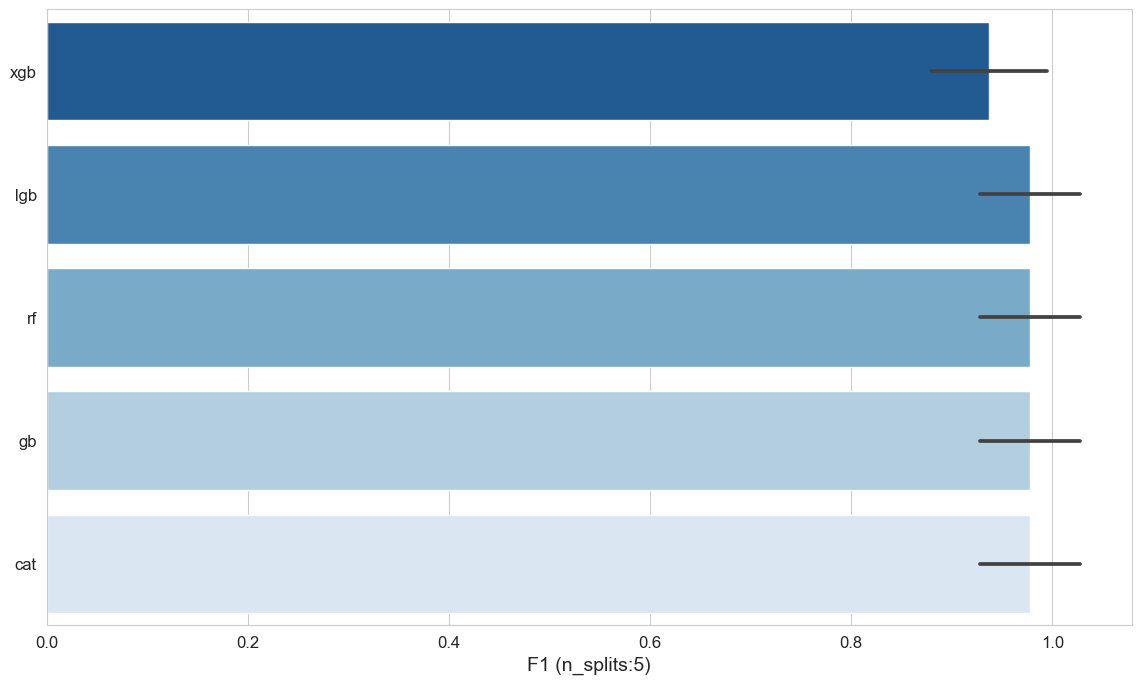

In [88]:
def plot_score_from_dict(score_dict, title='MAE', ascending=True):
    score_df = pd.melt(pd.DataFrame(score_dict))
    score_df = score_df.sort_values('value', ascending=ascending)
    
    plt.figure(figsize=(14, 8))
    sns.barplot(x='value', y='variable', data=score_df, palette='Blues_r', errorbar='sd')
    plt.xlabel(f'{title}', fontsize=14)
    plt.ylabel('')
    #plt.title(f'{title}', fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True, axis='x')

    plt.show()

print('--- Mean F1 Scores---')    
for name, score in score_dict.items():
    mean_score = np.mean(score)
    std_score = np.std(score)
    print(f'{name}: {red}{mean_score:.5f} ± {std_score:.5f}{res}')
plot_score_from_dict(score_dict, title=f'F1 (n_splits:{n_splits})')

Mean Optuna Ensemble F1 0.97778 ± 0.04444

--- Optuna Weights---
xgb: 0.45030 ± 0.00000
lgb: 0.73313 ± 0.00000
cat: 0.88522 ± 0.00000
rf: 0.30520 ± 0.00000
gb: 0.31382 ± 0.00000


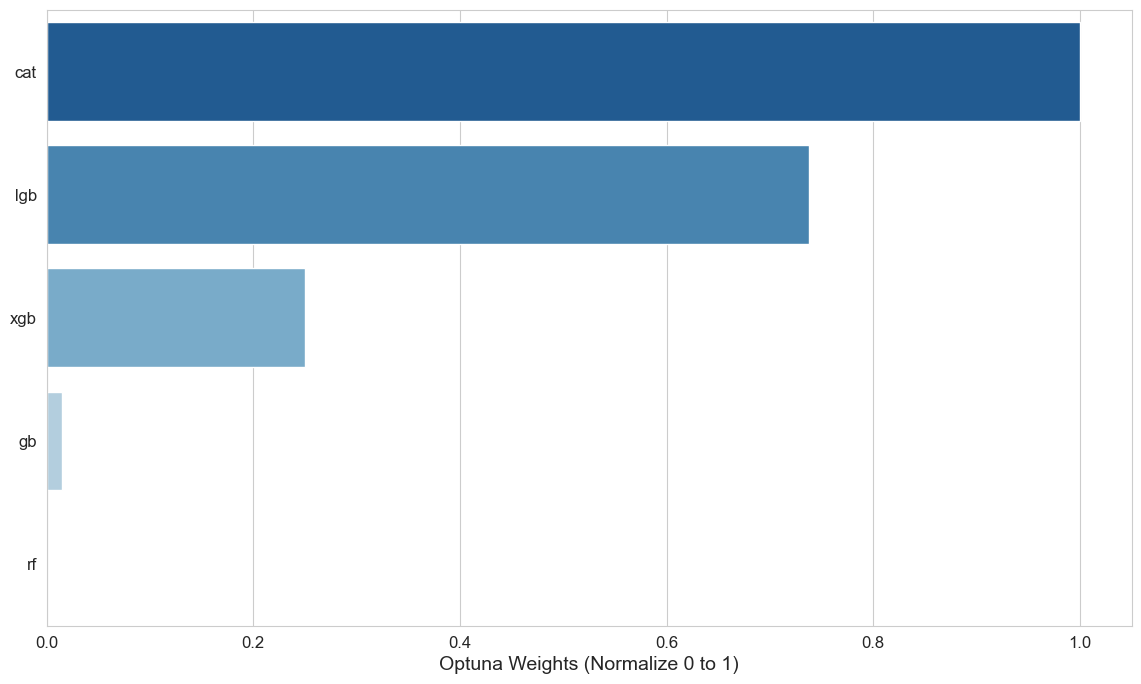

In [89]:
# Calculate the mean F1 score of the ensemble
mean_score = np.mean(ensemble_score)
std_score = np.std(ensemble_score)
print(f'{red}Mean{res} Optuna Ensemble F1 {red}{mean_score:.5f} ± {std_score:.5f}{res}')

print('')
# Print the mean and standard deviation of the ensemble weights for each model
print('--- Optuna Weights---')
mean_weights = np.mean(weights, axis=0)
std_weights = np.std(weights, axis=0)
for name, mean_weight, std_weight in zip(models.keys(), mean_weights, std_weights):
    print(f'{name}: {blu}{mean_weight:.5f} ± {std_weight:.5f}{res}')

# weight_dict = dict(zip(list(score_dict.keys()), np.array(weights).T.tolist()))
# plot_score_from_dict(weight_dict, title='Model Weights', ascending=False)
normalize = [((weight - np.min(weight)) / (np.max(weight) - np.min(weight))).tolist() for weight in weights]
weight_dict = dict(zip(list(score_dict.keys()), np.array(normalize).T.tolist()))
plot_score_from_dict(weight_dict, title='Optuna Weights (Normalize 0 to 1)', ascending=False)

In [ ]:
# Ensemble Mean F1 : 0.97778

# Compare Models

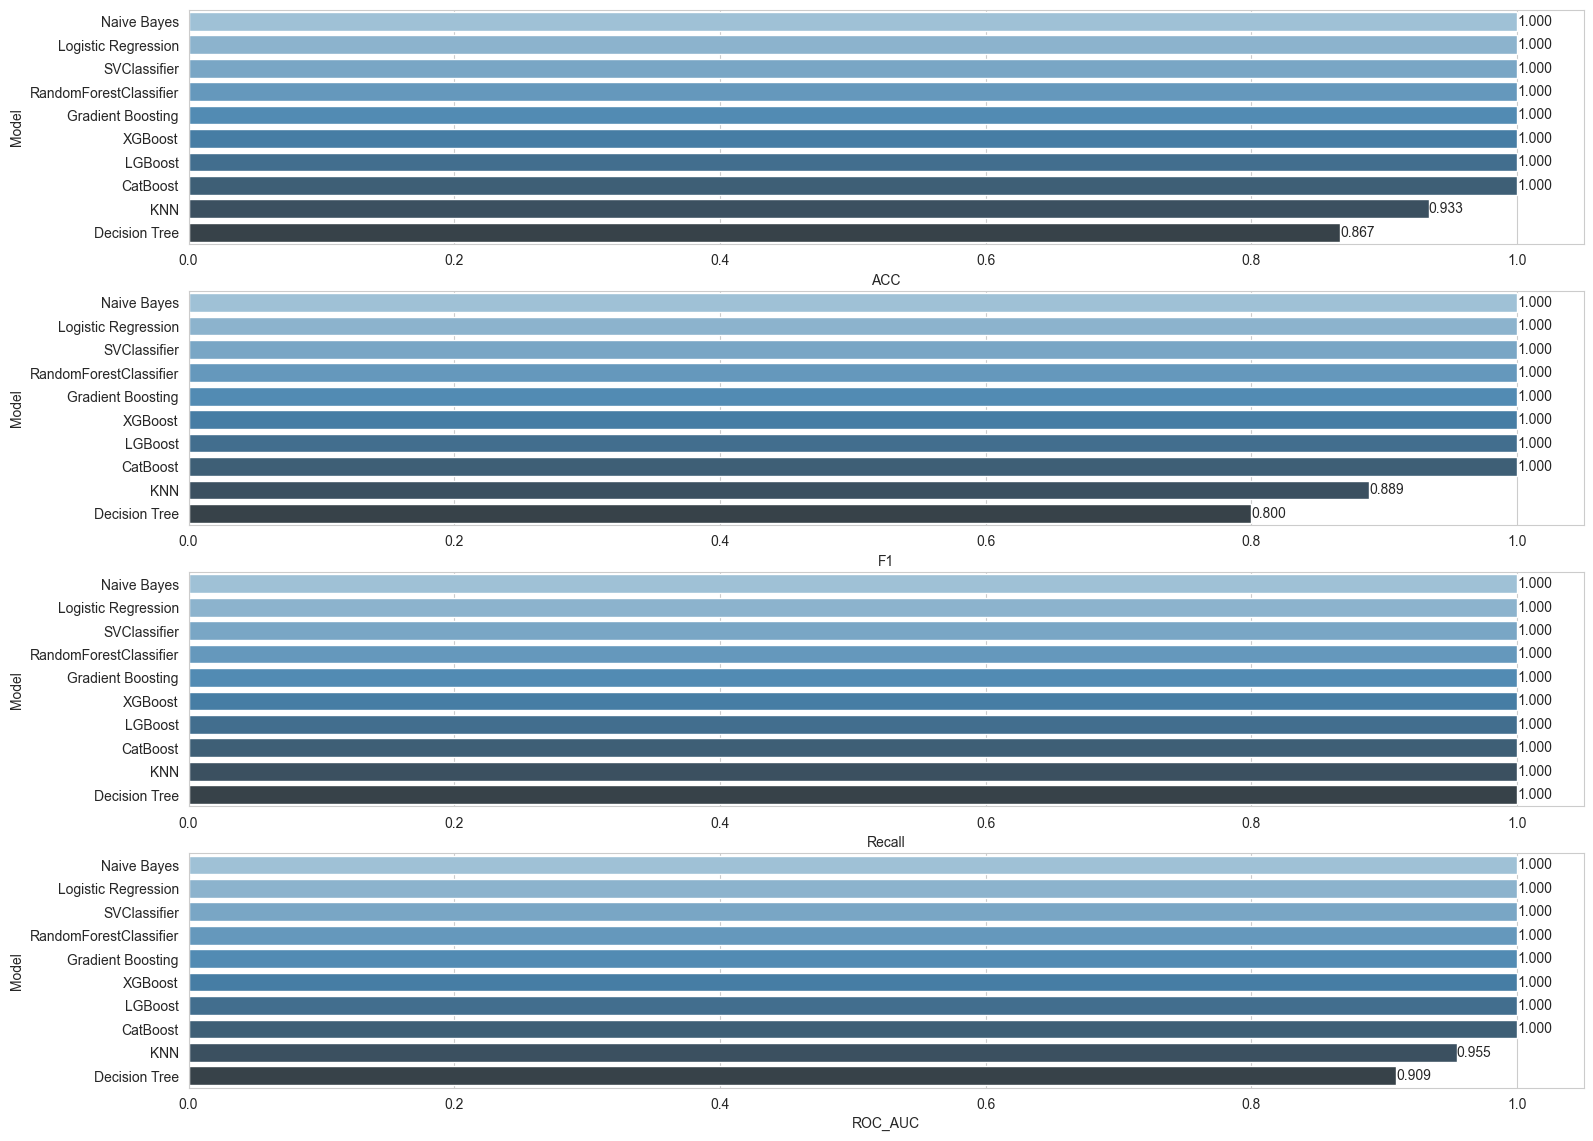

In [90]:
compare = pd.DataFrame({"Model": ["Naive Bayes", "Decision Tree", "KNN", "Logistic Regression", "SVClassifier", "RandomForestClassifier" ,"Gradient Boosting",
                                 "XGBoost", "LGBoost" , "CatBoost"],
                        "ACC": [nb_acc, dt_acc, knn_acc, log_acc, svc_acc, rf_acc, gb_acc, xgb_acc, lgb_acc, cb_acc],
                        "F1": [nb_f1, dt_f1, knn_f1, log_f1, svc_f1, rf_f1 , gb_f1, xgb_f1, lgb_f1 , cb_f1],
                        "Recall": [nb_recall, dt_recall, knn_recall, log_recall, svc_recall, rf_recall, gb_recall, xgb_recall, lgb_recall , cb_recall],
                        "ROC_AUC": [nb_rocauc, dt_rocauc, knn_rocauc, log_rocauc , svc_rocauc, rf_rocauc, gb_rocauc, xgb_rocauc, lgb_rocauc, cb_rocauc]
                        })

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(18,14))
plt.subplot(411)
compare = compare.sort_values(by="ACC", ascending=False)
ax=sns.barplot(x="ACC", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

In [ ]:
# Except KNN and Decision Tree, all models are good fitting for this problem. 
# Ensemble Model better realistic results and 0.97778 is the final score.

In [ ]:
# Done.